In [1]:
import pandas as pd
import numpy as np

import os 

import matplotlib.pyplot as plt

from pymatgen.core import Structure

from FeGB_PtableSeg.plotters import (custom_colors,
                                     gb_latex_dict,
                                     bulk_df,
                                     gb_marker_dict,
                                     get_element_number,
                                     get_element_symbol,
                                     plot_pivot_table,
                                     GB_symmetries,
                                     plot_prop_vs_prop_GB,
                                     plot_prop_vs_prop_with_2d_histograms
)

%load_ext autoreload
%autoreload 2

In [ ]:
fig_savepath = "/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/"

df = pd.read_pickle("2025_03_02_ptable_Fe_GB_df.pkl.gz", compression="gzip")
# Get rid of unphysical points
df.loc[(df["E_seg"] < -7) | (df["E_seg"] > 2), "E_seg"] = np.nan
df["Z"] = df.element.apply(get_element_number)
symmetries_dict = GB_symmetries().symmetry_dict_all.copy()
df["equivalent_sites"] = [symmetries_dict[row.GB][row.site] for _, row in df.iterrows()]
df["site_multiplicity"] = [len(row.equivalent_sites) for _, row in df.iterrows()]
df["GB_site"] = [row.GB +"-"+str(row.site) for _, row in df.iterrows()]
df.columns

Index(['job_name', 'structure', 'GB', 'element', 'site', 'Z', 'E_seg',
       'magmoms', 'convergence', 'GB_site', 'structure_unrel', 'E_seg_unrel',
       'magmoms_unrel', 'DDEC6_ANSBO_atomic_layers',
       'DDEC6_ANSBO_cleavage_coords', 'DDEC6_ANSBO_profile',
       'DDEC6_ANSBO_within_range', 'DDEC6_min_ANSBO', 'pure_ca_results',
       'pure_DDEC6_ANSBO_atomic_layers', 'pure_DDEC6_ANSBO_cleavage_coords',
       'pure_DDEC6_ANSBO_profile', 'pure_DDEC6_ANSBO_within_range',
       'pure_DDEC6_min_ANSBO', 'convergence_pureGB', 'magmoms_pureGB',
       'GB_element_site', 'Wsep_RGS_list', 'cleavage_planes', 'cp_names',
       'Wsep_RGS_min', 'pure_cleavage_planes', 'pure_cleavage_energies',
       'pure_min_wsep_rigid', 'site_z', 'solute_idx', 'equivalent_sites',
       'site_multiplicity', 'dist_GB', 'magmom_solute',
       'Wsep_RGS_cleavage_planes', 'Wsep_RGS_min_pure', 'DDEC6_ANSBO_min',
       'R_Wsep_RGS', 'R_Wsep_RGS_lst', 'R_DDEC6_ANSBO', 'R_DDEC6_ANSBO_lst',
       'ANSBO_Wsep_

# Visualise the data, 
## Relaxed and unrelaxed E_segs plotted over all sites studied

/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:596: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cm.set_ticklabels(cm.get_ticks(), fontsize=colormap_tick_fontsize)  # Set the modified tick labels
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:34: UserWarning: Warning: Element with Z:0.0 was not found.
  warnings.warn(f"Warning: Element with Z:{element_number} was not found.")
/tmp/ipykernel_2102/827615237.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:596: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cm.set_ticklabels(cm.get_ticks(), fontsize=colormap_tick_fontsize)  # Set the 

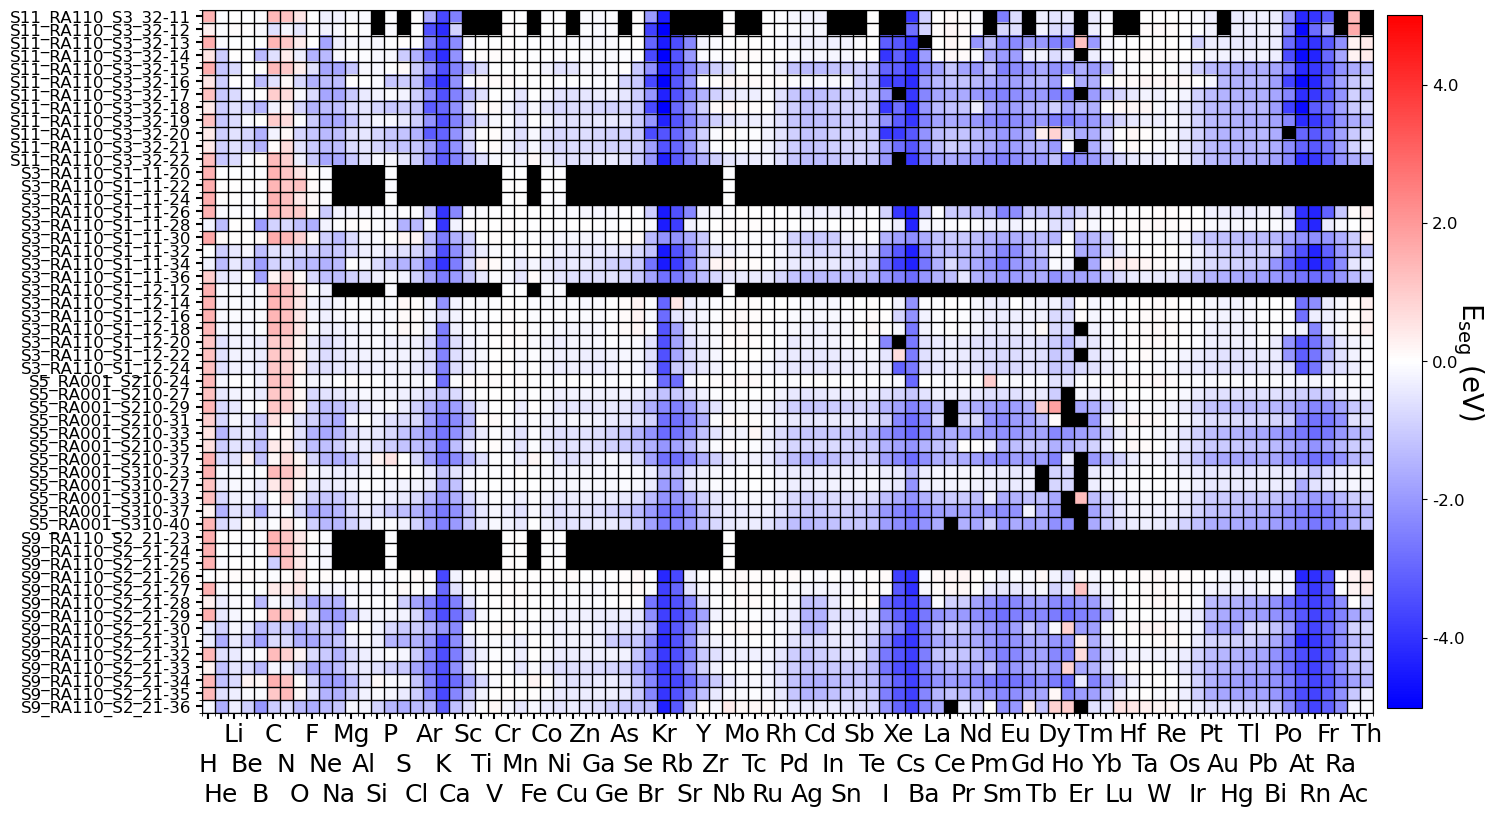

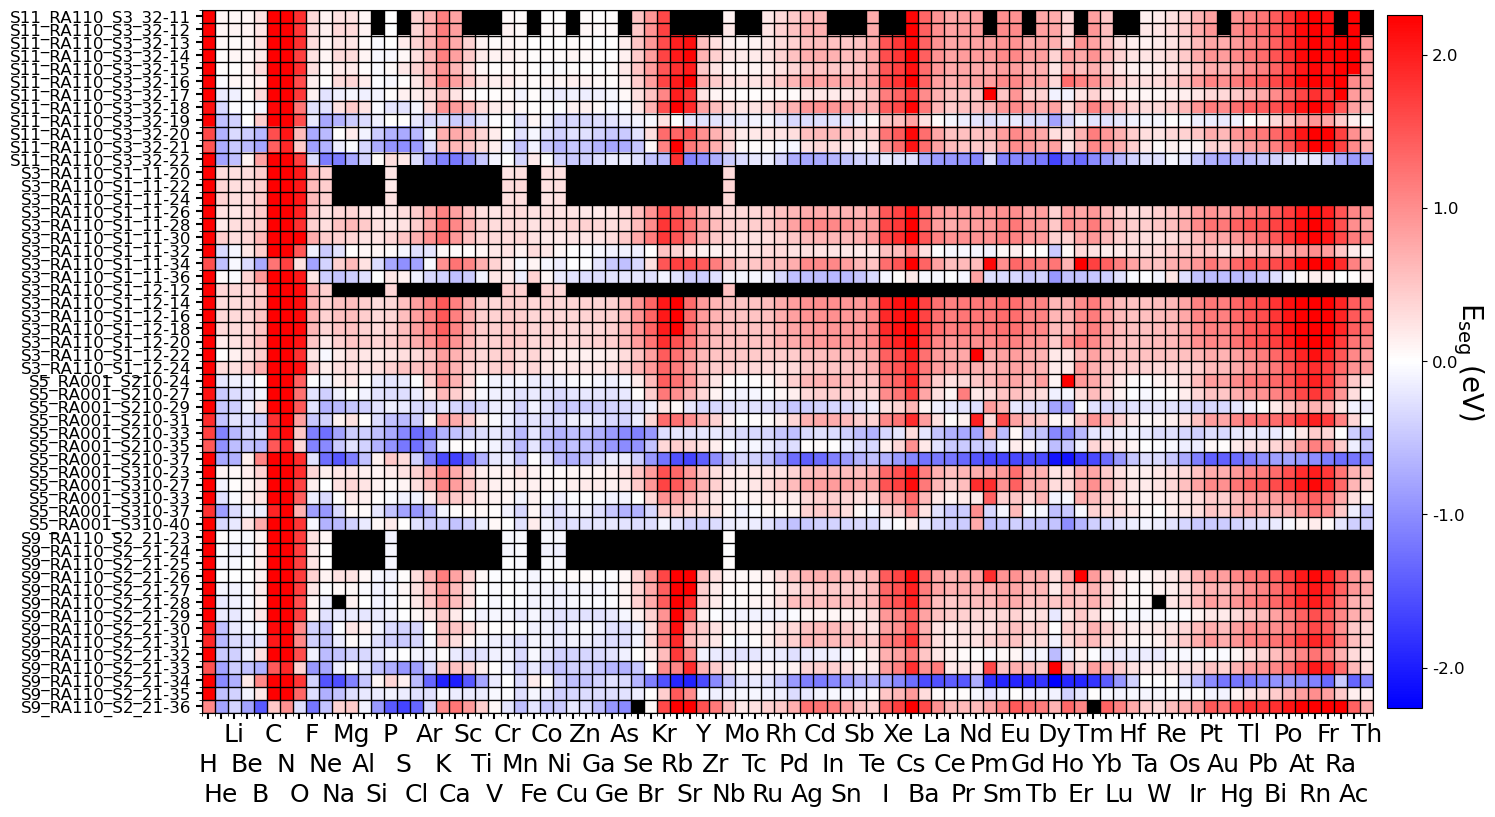

In [3]:
import matplotlib.transforms as mtransforms
# Plot the pivot table for E_seg
fig, axs = plot_pivot_table(df.pivot_table(values='E_seg', index='GB_site', columns='Z'))

# Ensure axs is iterable (in case a single axis is returned)
for ax in np.atleast_1d(axs):
    # Get current xtick values and build new labels
    xticks = ax.get_xticks()
    new_labels = [get_element_symbol(tick+1) for tick in xticks]
    ax.set_xticklabels(new_labels)
    
    # Now offset the tick labels vertically in a repeating pattern (3 rows)
    # Here, we apply a vertical translation (in axis coordinate units) that depends on the index modulo 3.
    for i, label in enumerate(ax.get_xticklabels()):
        # Determine the vertical offset: adjust the multiplier (e.g., 0.05) as needed
        offset_amount = 0.3 * (i % 3)
        # Create a translation transform in display units using the figure's dpi scaling
        offset = mtransforms.ScaledTranslation(0, -offset_amount, ax.figure.dpi_scale_trans)
        # Add the offset to the current transform of the label
        label.set_transform(label.get_transform() + offset)

# Do the same for E_seg_unrel plot
fig, axs = plot_pivot_table(df.pivot_table(values='E_seg_unrel', index='GB_site', columns='Z'))

for ax in np.atleast_1d(axs):
    xticks = ax.get_xticks()
    new_labels = [get_element_symbol(tick+1) for tick in xticks]
    ax.set_xticklabels(new_labels)
    
    for i, label in enumerate(ax.get_xticklabels()):
        offset_amount = 0.3 * (i % 3)
        offset = mtransforms.ScaledTranslation(0, -offset_amount, ax.figure.dpi_scale_trans)
        label.set_transform(label.get_transform() + offset)

# Manuscript plots

## Figure 2

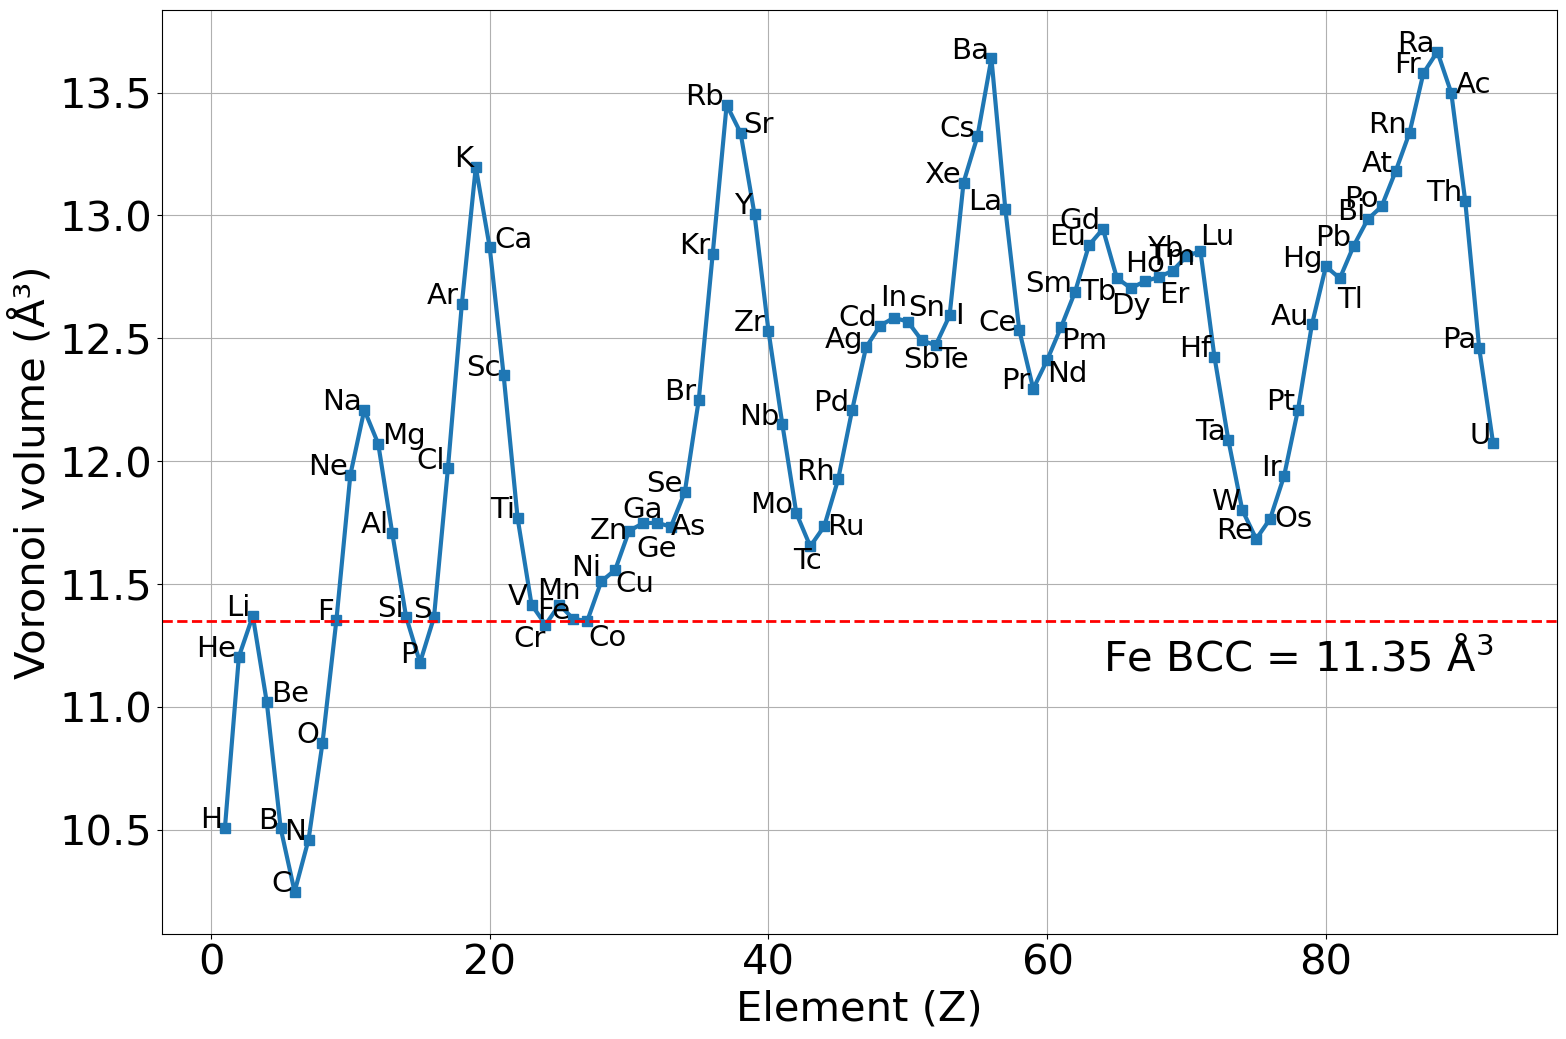

In [4]:
column = "vvol"
# Plotting column against 'Z'
plt.figure(figsize=(18, 12))
plt.plot(bulk_df['Z'], bulk_df[column], marker='s', linewidth = 3, markersize=7)

# Adding a horizontal line
# plt.axhline(y=11.356932331342922, color='r', linestyle='--', label='Fe BCC bulk')
# plt.text(92, 11.356932331342922-0.2, "Fe BCC = 11.35 Å³", fontsize=30, ha='right')

#Labeling points on the plot below each point
element_fontsize = 21
for idx, row in bulk_df.iterrows():
    if row.element == "Mg":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Be":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Ca":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "V":
        plt.text(row['Z']-0.3, row[column], row['element'], fontsize=element_fontsize, ha='right')
    elif row.element == "Cr":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top', ha="right")
    elif row.element == "Mn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="center")
    elif row.element == "Co":
        plt.text(row['Z']+0.1, row[column]-0.01, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Cu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ni":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="right")
    elif row.element == "Zn":
        plt.text(row['Z']-0.1, row[column], row['element'], fontsize=element_fontsize, va='center', ha="right")
    elif row.element == "Ga":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha='center')
    elif row.element == "Ge":
        plt.text(row['Z'], row[column]-0.05, row['element'], fontsize=element_fontsize, va='top', ha='center')
    elif row.element == "As":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Sr":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Tc":
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ru":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va='center')
    elif row.element == "In":
        plt.text(row['Z'], row[column]+0.05, row['element'], fontsize=element_fontsize, ha='center')
    elif row.element == "Sn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='bottom')
    elif row.element == "Sb":
        plt.text(row['Z'], row[column]-0.02, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Te":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "I":
        plt.text(row['Z']+0.4, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Nd":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Pm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Tb":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='right', va="top")
    elif row.element == "Dy":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ho":
        plt.text(row['Z'], row[column]+0.015, row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Er":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "Tm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Lu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="bottom")
    elif row.element == "Os":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Tl":
        plt.text(row['Z']-0.2, row[column]-0.03, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ac":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    else:
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='right')

# Adding labels, title, and grid
plt.xlabel("Element (Z)", fontsize=30)
plt.ylabel("Voronoi volume (Å³)", fontsize=30)
# plt.title(columnvs Atomic Number (Z)", fontsize=24)
plt.grid(True)
# Adjusting tick size
plt.tick_params(axis='x', labelsize=30)  # Adjust x-tick label size
plt.tick_params(axis='y', labelsize=30)  # Adjust x-tick label size
plt.axhline(11.35, color='red', linestyle='--', linewidth=2)
plt.text(64, 11.35 - 0.2, r"Fe BCC = 11.35 $\rm{\AA}^3$", color='k', fontsize=30)

plt.savefig(f"{fig_savepath}/Figure2.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 3
### Min segregation energy vs element

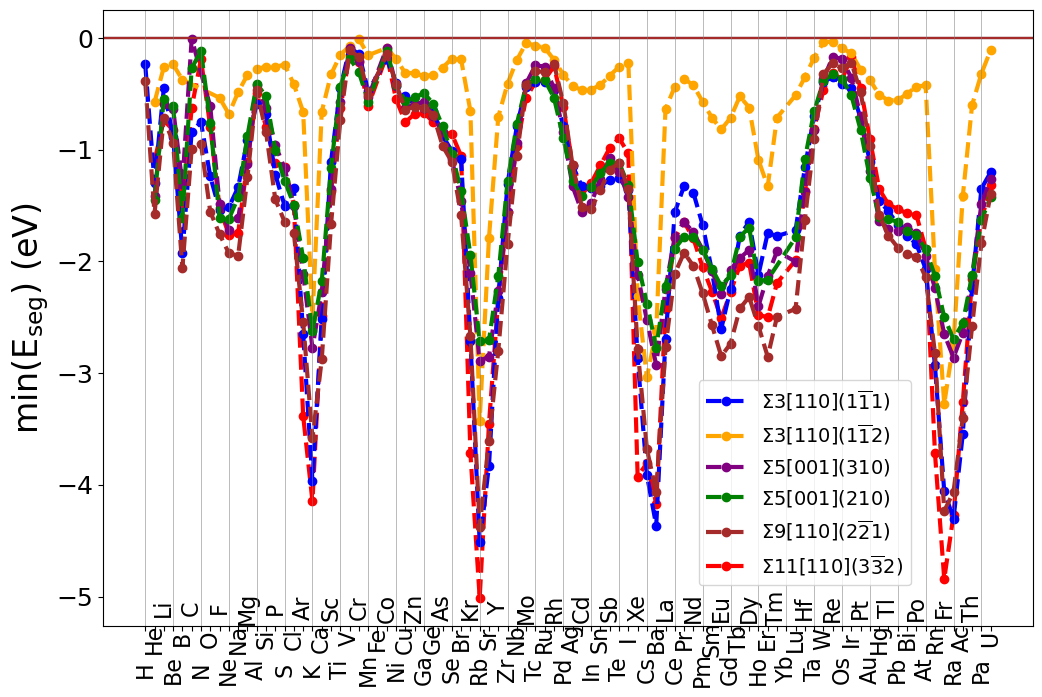

In [5]:
from FeGB_PtableSeg.plotters import plot_minEseg_prop_vs_Z

fig = plot_minEseg_prop_vs_Z(df,
                        y_prop="E_seg",
                      x_prop="Z",
                      ylabel=r"$\rm{min}(E_{\rm{seg}})$ (eV)",
                      figsize=(12, 8),
                      shift_xticks=True,
                      xlabel_fontsize=24,
                      xtick_yshift = -0.045,
                      ylabel_fontsize=24,
                      xtick_fontsize=16,
                      ytick_fontsize=18,
                      legend_fontsize=14)

plt.savefig(f"{fig_savepath}/Figures/minEseg_perGB_vs_Z.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 4 
### Maximum segregation binding vs Voronoi volume in bulk

In [6]:
mineseg_df = []
# Looping over each unique "GB" group
for idx, (gb, group) in enumerate(df.dropna(subset=["E_seg"]).groupby("GB")):
    # For each "GB" group, group by "element" and find the minimum "Eseg"
    min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
    min_eseg_per_element = min_eseg_per_element[min_eseg_per_element['E_seg'] <= 0]
    min_eseg_per_element = min_eseg_per_element.reset_index(drop=True).merge(bulk_df[["vvol", "element"]], on = "element")
    mineseg_df.append(min_eseg_per_element)
mineseg_df = pd.concat(mineseg_df)
# vertical Fe line at Fe VorVol
# Get the Voronoi volume for Fe from bulk_df
fe_vvol = bulk_df[bulk_df["element"] == "Fe"].vvol.values[0]

# Filter mineseg_df for rows where 'vvol' is within 0.2 of Fe's Voronoi volume
filtered_mineseg_df = mineseg_df[(mineseg_df["vvol"] >= fe_vvol - 0.2) & (mineseg_df["vvol"] <= fe_vvol + 0.2)]

# Display the filtered rows
filtered_mineseg_df[["element", "GB", "E_seg", "vvol"]]


/tmp/ipykernel_2102/798522665.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
/tmp/ipykernel_2102/798522665.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
/tmp/ipykernel_2102/798522665.py:5: DeprecationWarni

element               GB     E_seg    vvol
17      Co  S11_RA110_S3_32 -0.154494  11.351
18      Cr  S11_RA110_S3_32 -0.214218  11.335
20      Cu  S11_RA110_S3_32 -0.753652  11.558
24       F  S11_RA110_S3_32 -1.518137  11.355
29      He  S11_RA110_S3_32 -1.102779  11.205
..     ...              ...       ...     ...
50      Ni   S9_RA110_S2_21 -0.416380  11.511
53       P   S9_RA110_S2_21 -1.445304  11.181
67       S   S9_RA110_S2_21 -1.643592  11.365
71      Si   S9_RA110_S2_21 -0.840507  11.367
84       V   S9_RA110_S2_21 -0.110203  11.417

[72 rows x 4 columns]

/tmp/ipykernel_2102/584612132.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
/tmp/ipykernel_2102/584612132.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
/tmp/ipykernel_2102/584612132.py:6: DeprecationWarni

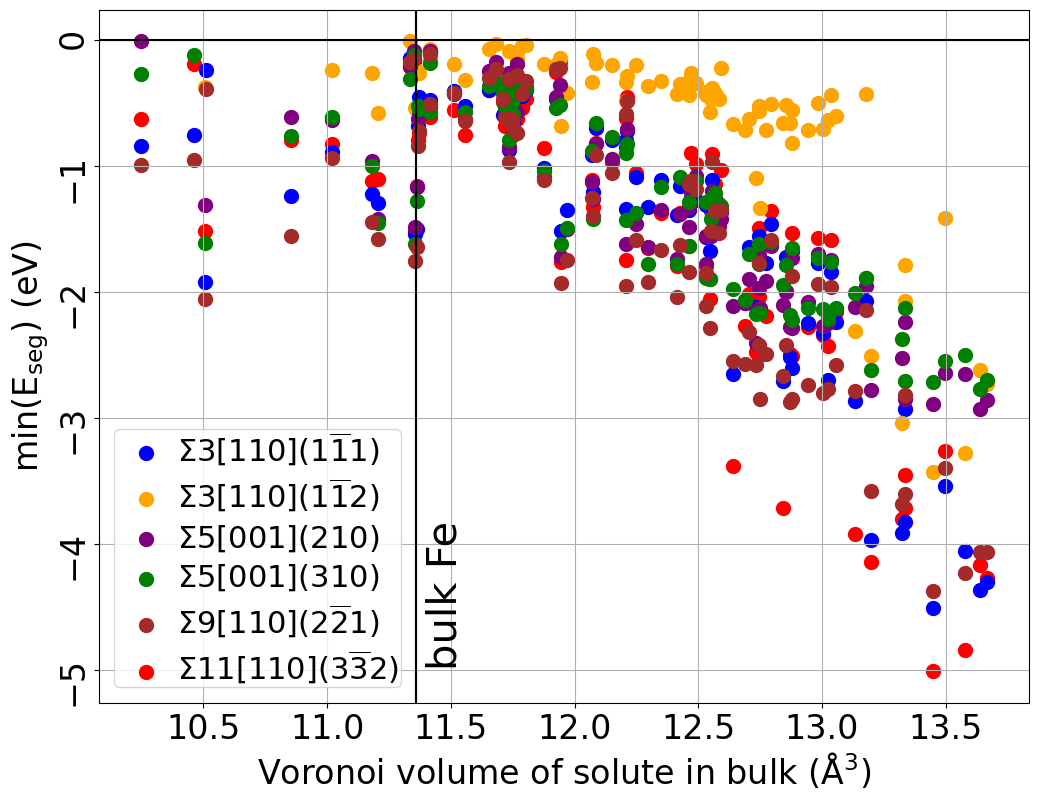

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 9))
gb_legends = []
# Looping over each unique "GB" group
for idx, (gb, group) in enumerate(df.dropna(subset=["E_seg"]).groupby("GB")):
    # For each "GB" group, group by "element" and find the minimum "Eseg"
    min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
    min_eseg_per_element = min_eseg_per_element[min_eseg_per_element['E_seg'] <= 0]
    min_eseg_per_element = min_eseg_per_element.reset_index(drop=True).merge(bulk_df[["vvol", "element"]], on = "element")

    x_values = min_eseg_per_element['vvol']  # "VorVol" values for x-axis
    y_values = min_eseg_per_element['E_seg']  # Corresponding "E_seg" values, can change this to any column in df, i.e. R_

    # Plot for "E_seg" on the primary y-axis
    line1= ax1.scatter(x_values, y_values, color=custom_colors[gb], marker="o", s=100)

    gb_legends.append((line1, f'{gb_latex_dict[gb]}'))
    
gb_legends.append(gb_legends.pop(0))
# Set labels and axis
ax1.set_ylabel(r"min$(\rm{E}_{\rm{seg}})$ (eV)", fontsize=24)
ax1.set_xlabel(r"Voronoi volume of solute in bulk ($\rm{\AA}^3$)", fontsize=24)

ax1.tick_params(axis='y', labelsize=24, rotation=90)
ax1.tick_params(axis='x', labelsize=24)

# horizontal ref line at 0 E_seg
ax1.axhline(0, color="k")
# vertical Fe line at Fe VorVol
ax1.axvline(bulk_df[bulk_df["element"] == "Fe"].vvol.values[0], color="k")
ax1.text(bulk_df[bulk_df["element"] == "Fe"].vvol.values[0]+0.2, -5, "bulk Fe", verticalalignment='bottom', horizontalalignment='right', rotation='vertical', fontsize=30)

ax1.axvline(bulk_df[bulk_df["element"] == "Fe"].vvol.values[0], color="k")
ax1.grid(which="major")

gb_legend = plt.legend(*zip(*gb_legends), loc='lower left', fontsize=22, handletextpad=0.01, borderpad=0.05, labelspacing=0.3)

plt.savefig(f"{fig_savepath}/Figure4.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 5

In [8]:
from scipy.stats import pearsonr, spearmanr

VorVol_Eseg_corrlist = []
magmom_Eseg_corrlist = []
VorVol_magmom_corrlist = []
element_str_list = []

for element_str, element_df in df.groupby("element"):
    element_df = element_df[element_df["VorNN_tot_vol"] < 40]

    try:
        pearson_corr, _ = pearsonr(element_df.VorNN_tot_vol.values, element_df.E_seg.values)
        spearman_corr, _ = spearmanr(element_df.VorNN_tot_vol.values, element_df.E_seg.values)
    except ValueError:
        pearson_corr, spearman_corr = np.nan, np.nan
    VorVol_Eseg_corrlist.append((pearson_corr, spearman_corr))
    
    try:
        pearson_corr, _ = pearsonr(element_df.magmom_solute.values, element_df.E_seg.values)
        spearman_corr, _ = spearmanr(element_df.magmom_solute.values, element_df.E_seg.values)
    except ValueError:
        pearson_corr, spearman_corr = np.nan, np.nan
    magmom_Eseg_corrlist.append((pearson_corr, spearman_corr))
    
    try:
        pearson_corr, _ = pearsonr(element_df.VorNN_tot_vol.values, element_df.magmom_solute.values)
        spearman_corr, _ = spearmanr(element_df.VorNN_tot_vol.values, element_df.magmom_solute.values)
    except ValueError:
        pearson_corr, spearman_corr = np.nan, np.nan
    VorVol_magmom_corrlist.append((pearson_corr, spearman_corr))
    
    element_str_list.append(element_str)

corr_r_vvol_eseg = dict(zip(element_str_list, VorVol_Eseg_corrlist))
corr_r_magmom_Eseg = dict(zip(element_str_list, magmom_Eseg_corrlist))
corr_vvol_magmom = dict(zip(element_str_list, VorVol_magmom_corrlist))

bulk_df["pearson_r_vvol_eseg"] = [corr_r_vvol_eseg[row.element][0] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["spearman_r_vvol_eseg"] = [corr_r_vvol_eseg[row.element][1] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["pearson_r_magmom_Eseg"] = [corr_r_magmom_Eseg[row.element][0] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["spearman_r_magmom_Eseg"] = [corr_r_magmom_Eseg[row.element][1] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["pearson_r_vvol_magmom"] = [corr_vvol_magmom[row.element][0] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]
bulk_df["spearman_r_vvol_magmom"] = [corr_vvol_magmom[row.element][1] if row.element not in ["Fe", "Yb"] else np.nan for i, row in bulk_df.iterrows()]

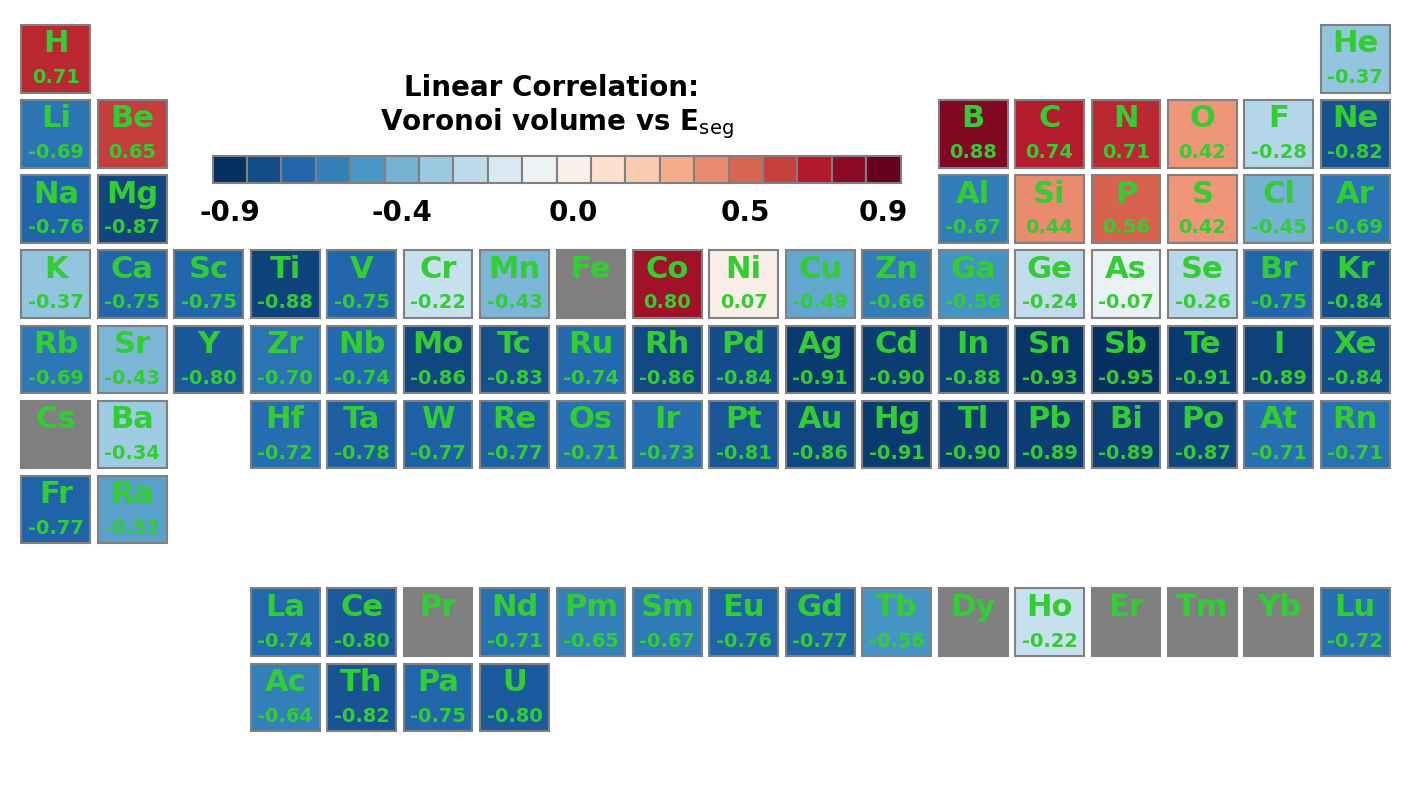

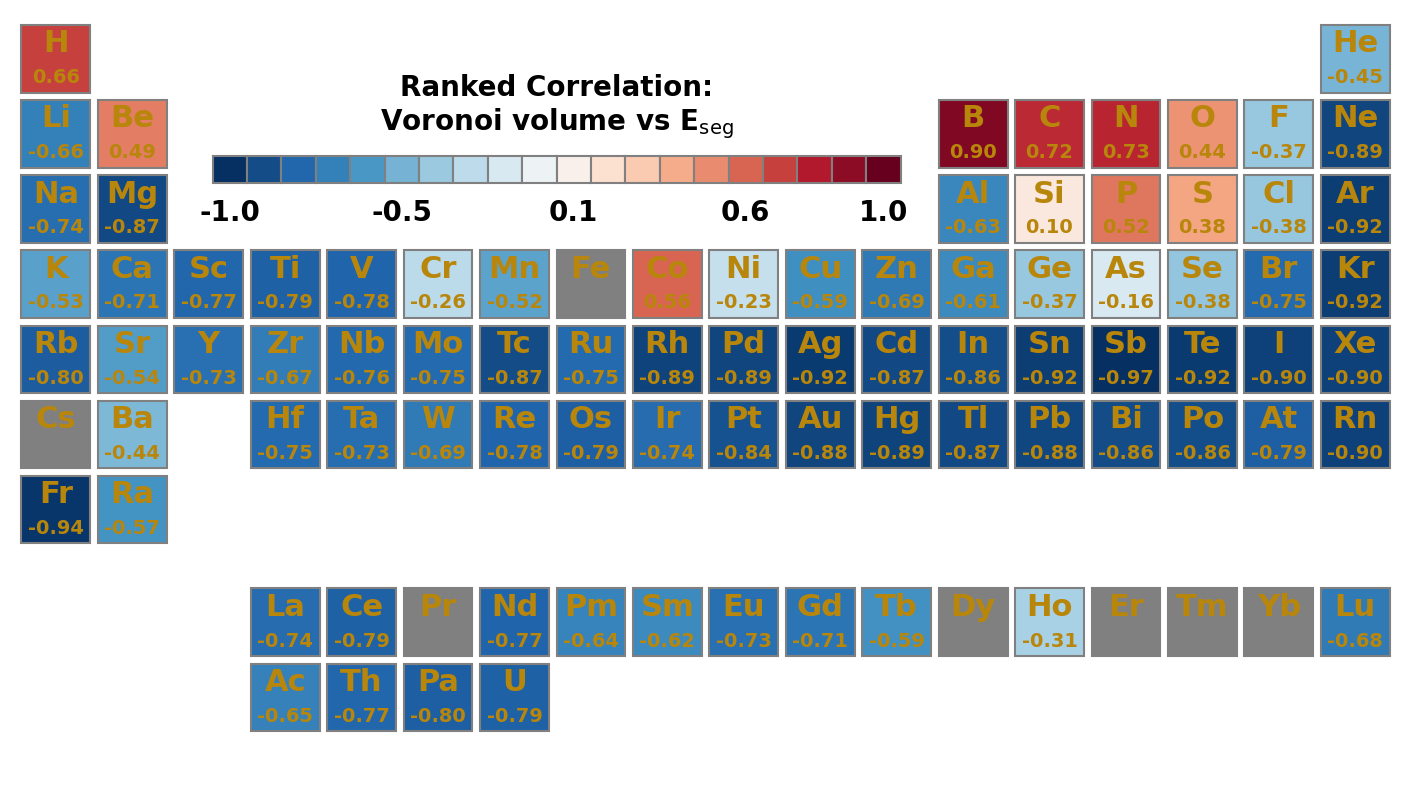

In [9]:
import matplotlib.cm as cm
from FeGB_PtableSeg.plotters import periodic_table_plot

# Also try pearson_r_magmom_Eseg, pearson_r_vvol_magmom to see their correlations too!

fig, ax = periodic_table_plot(bulk_df,
                    "pearson_r_vvol_eseg",
                    center_cm_zero=True,
                    cmap = cm.RdBu_r,
                    property_name=r"Linear Correlation: " + "\n"+r"Voronoi volume vs E$_{\rm seg}$",
                    element_font_color="limegreen"
                    )
fig.savefig(f"{fig_savepath}/Figures/Ptable_Correlation_Plots/Ptable_LinearCorrelation_VorVol_Eseg.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"{fig_savepath}/Figure5.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

fig, ax = periodic_table_plot(bulk_df,
                    "spearman_r_vvol_eseg",
                    center_cm_zero=True,
                    cmap = cm.RdBu_r,
                    property_name=r"Ranked Correlation:" + "\n"+r"Voronoi volume vs E$_{\rm seg}$")
fig.savefig(f"{fig_savepath}/Figures/Ptable_Correlation_Plots/Ptable_RankCorrelation_VorVol_Eseg.png", dpi=300, bbox_inches='tight', pad_inches=0.1)



## Preparation for spectral plots

This reshapes the df to contain the site-spectra for both segregation energy and cohesive effects in rows

1 row -> 1 GB+element combination

In [10]:
df_spectra_lst = []

for gb, gb_df in df[df["dist_GB"] < 3.5].groupby("GB"):
    for element, element_df in gb_df.groupby("element"):
        element_df = element_df.dropna(subset=["structure"])
        element_df = element_df.reset_index(drop=True)
        unique_site_spectra = element_df.E_seg.values
        element_seg_spectra = []
        element_coh_min_ANSBO_spectra =[]
        element_coh_min_wsep_spectra = []
        element_df["eta_min_R_ANSBO"] = element_df.R_DDEC6_ANSBO.values - 1
        element_df["eta_min_R_Wsep_RGS"] = element_df.R_Wsep_RGS.values - 1
        for _, site_row in element_df.iterrows():
            element_seg_spectra += [site_row.E_seg] * int(site_row.site_multiplicity)
            element_coh_min_ANSBO_spectra += [site_row.eta_min_R_ANSBO] * int(site_row.site_multiplicity)
            element_coh_min_wsep_spectra += [site_row.eta_min_R_Wsep_RGS] * int(site_row.site_multiplicity)
        df_spectra_lst.append([gb,
                           element,
                           element_df.Z.values[0],
                           element_df.site.values,
                           element_df.site_multiplicity.values,
                           element_seg_spectra,
                           unique_site_spectra,
                           element_coh_min_ANSBO_spectra,
                           element_df.eta_min_R_ANSBO.values,
                           element_coh_min_wsep_spectra,
                            element_df.eta_min_R_Wsep_RGS.values])
df_spectra = pd.DataFrame(df_spectra_lst, columns = ["GB",
                                    "element",
                                    "Z",
                                    "unique_sites",
                                    "site_multiplicity",
                                    "full_seg_spectra",
                                    "unique_seg_spectra",
                                    "eta_coh_ANSBO_spectra",
                                    "unique_eta_ANSBO_spectra",
                                    "eta_coh_wsep_spectra",
                                    "unique_eta_wsep_spectra"])

## Figure 6

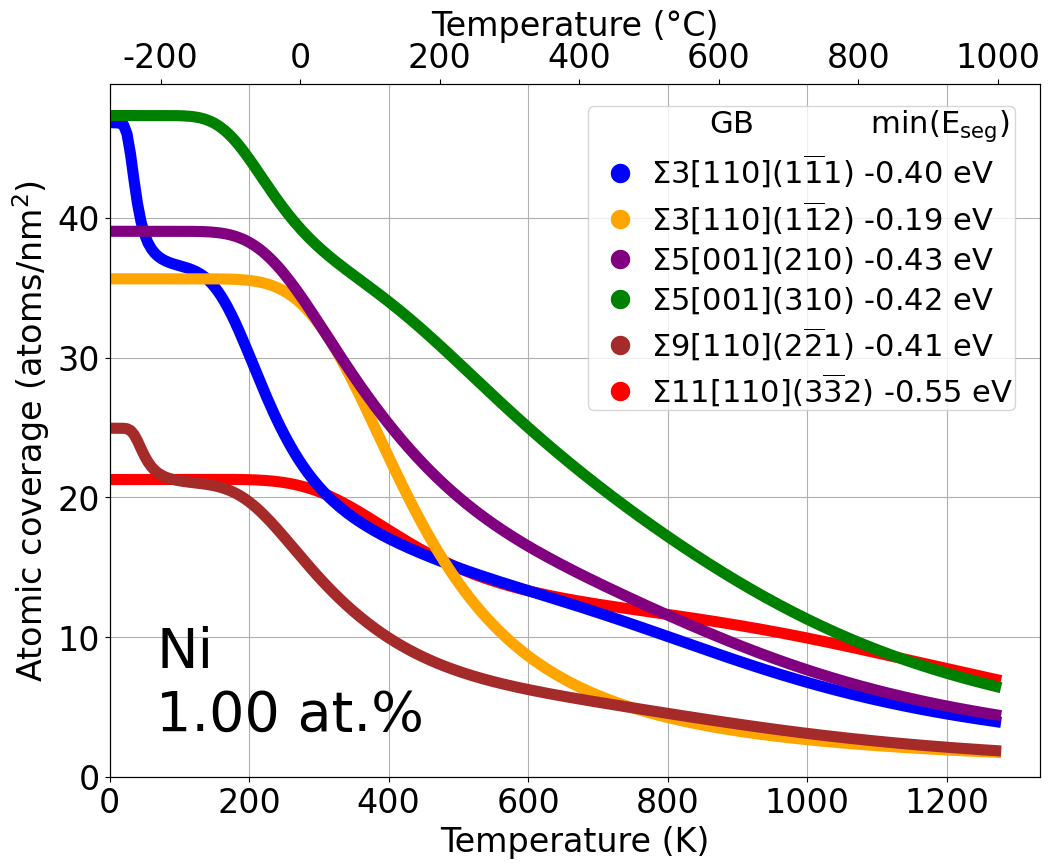

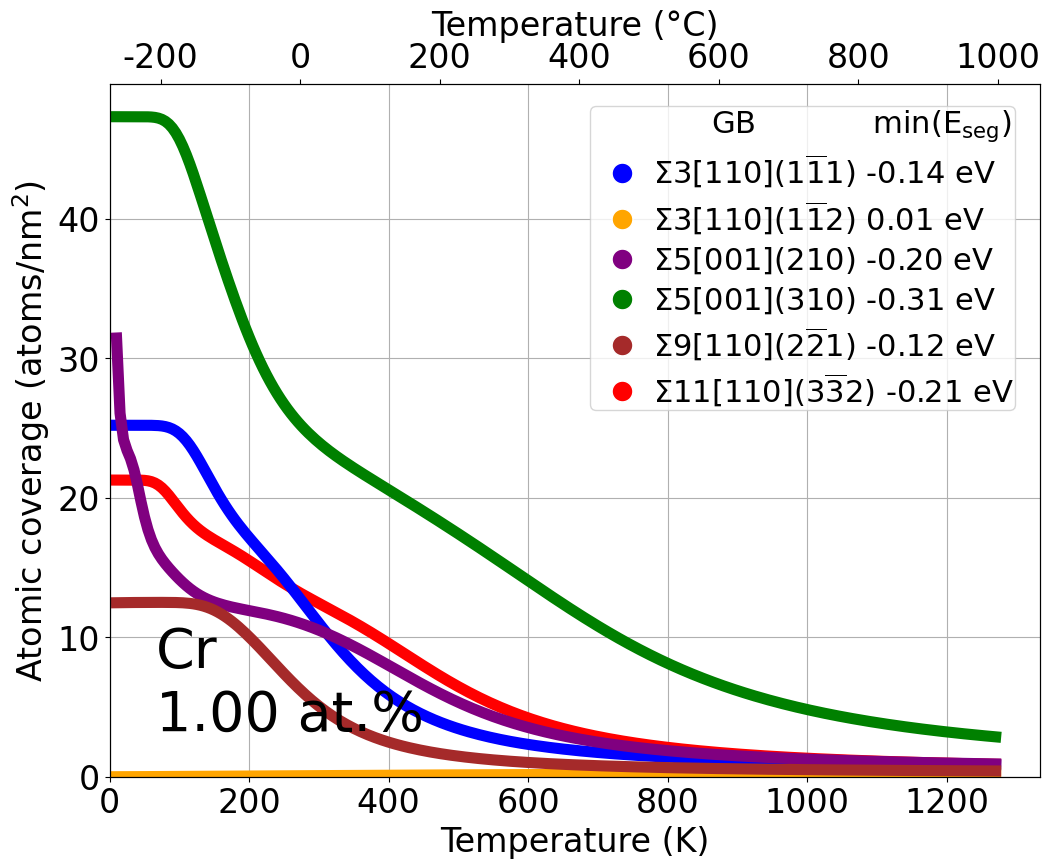

In [11]:
from FeGB_PtableSeg.plotters import plot_coverage_vs_temperature
#alloy_conc = [0.1, 0.5, 1, 2, 3, 4, 5, 10]
alloy_conc = [1]

temperature_range = np.arange(10, 1273, 5)
elements = ["Ni", "Cr"]
for conc in alloy_conc:
    if conc == 1:
        close_fig=False
    else:
        close_fig=True
    for element in elements:
        fig, ax = plot_coverage_vs_temperature(df, df_spectra, conc, temperature_range, element, close_fig=close_fig)
        if element in ["Ni", "Cr"]:
            if element == "Ni":
                fig.savefig(f"{fig_savepath}/Figure6a.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)
            else:
                fig.savefig(f"{fig_savepath}/Figure6b.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 7

In [12]:
from utils.plotters.grid_plots import plot_pivot_table

#fig, axs = plot_pivot_table(df.pivot_table(values='E_seg', index='GB_site', columns='Z'))

# This bit deals with the structure-sites that we don't want to include due to us excluding sites that are too far away in some elements deliberately
ids_to_drop = ['S11_RA110_S3_32_11', 'S11_RA110_S3_32_12', 'S3_RA110_S1_11_20', 'S3_RA110_S1_11_22', 'S3_RA110_S1_11_24', 'S3_RA110_S1_12_12', 'S9_RA110_S2_21_23', 'S9_RA110_S2_21_24', 'S9_RA110_S2_21_25']
df_plot = df.copy()
df_plot = df_plot[~df_plot['GB_site'].isin(ids_to_drop)]
gb_site_Z_Eseg_pivot = df_plot.pivot_table(values='E_seg', index='GB_site', columns='Z')

nan_points = [(index, col) for index in gb_site_Z_Eseg_pivot.index for col in gb_site_Z_Eseg_pivot.columns if np.isnan(gb_site_Z_Eseg_pivot.at[index, col])]
nan_segregation = []
for GB_site, Z in nan_points:
    # print(GB_site, Z)
    nan_segregation.append(("_".join(GB_site.split("_")[:-1])+f"_{int(Z)}"))
nan_segregation = np.unique(nan_segregation)

### Figure 7a 
#### Why only looking at the strongest binding sites predicted by DFT doesn't give an accurate picture of interfacial coverage in real alloys

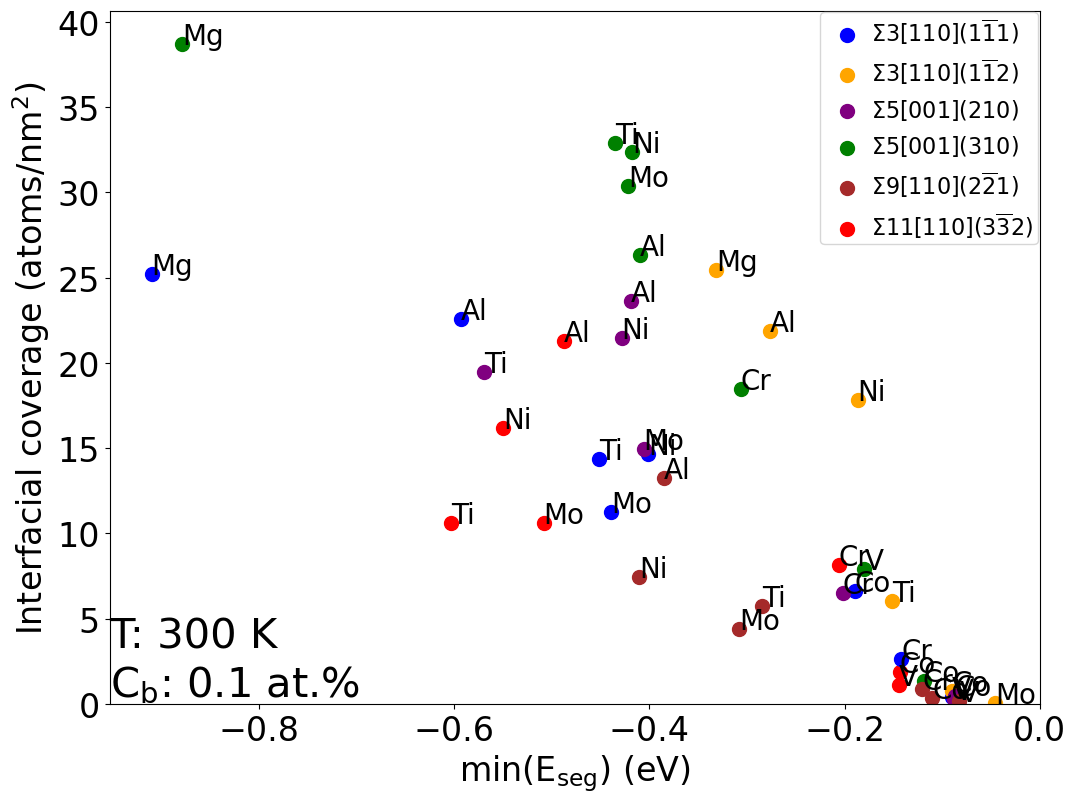

In [13]:
from FeGB_PtableSeg.plotters import plot_interfacial_coverage_vs_minEseg
fig, ax = plot_interfacial_coverage_vs_minEseg(df,
                                    df_spectra,
                                    ["Ni", "Cr", "Co", "Mo", "Ti", "V", "Al", "Mg"],
                                    atomic_pct_conc=0.1, # 0.1 at. % 
                                    temp=300, # 300 K
                                    nan_segregation=nan_segregation, # Spectra with at least 1 non-converged value are not plottable
                                    gb_latex_dict=gb_latex_dict,
                                    custom_colors=custom_colors)


### Figure 7b Nb
#### Why measuring segregation energies from interfacial excess in experiments and extrapolating this single segregation energy is a bad idea

In [14]:
from FeGB_PtableSeg.plotters import plot_Eseg_vs_temperature

# def calculate_effective_temperature_eseg(y, T, cB, kB=8.6173303e-05):
#     """
#     Calculate the effective segregation energy Eseg of the spectra from the given parameters.

#     Parameters:
#     y (float): The term from the equation.
#     T (float): The temperature in Kelvin.
#     cB (float): The concentration of B.
#     kB (float): The Boltzmann constant, default 1.38e-23 J/K.

#     Returns:
#     float: The calculated segregation energy Eseg in Joules.
#     """
#     if y * cB - cB == 0:
#         return np.nan
#         #raise ValueError("The denominator becomes zero, adjust your input values.")
    
#     numerator = y * cB - y
#     denominator = y * cB - cB
#     Eseg = -kB * T * np.log(numerator / denominator)
#     return Eseg

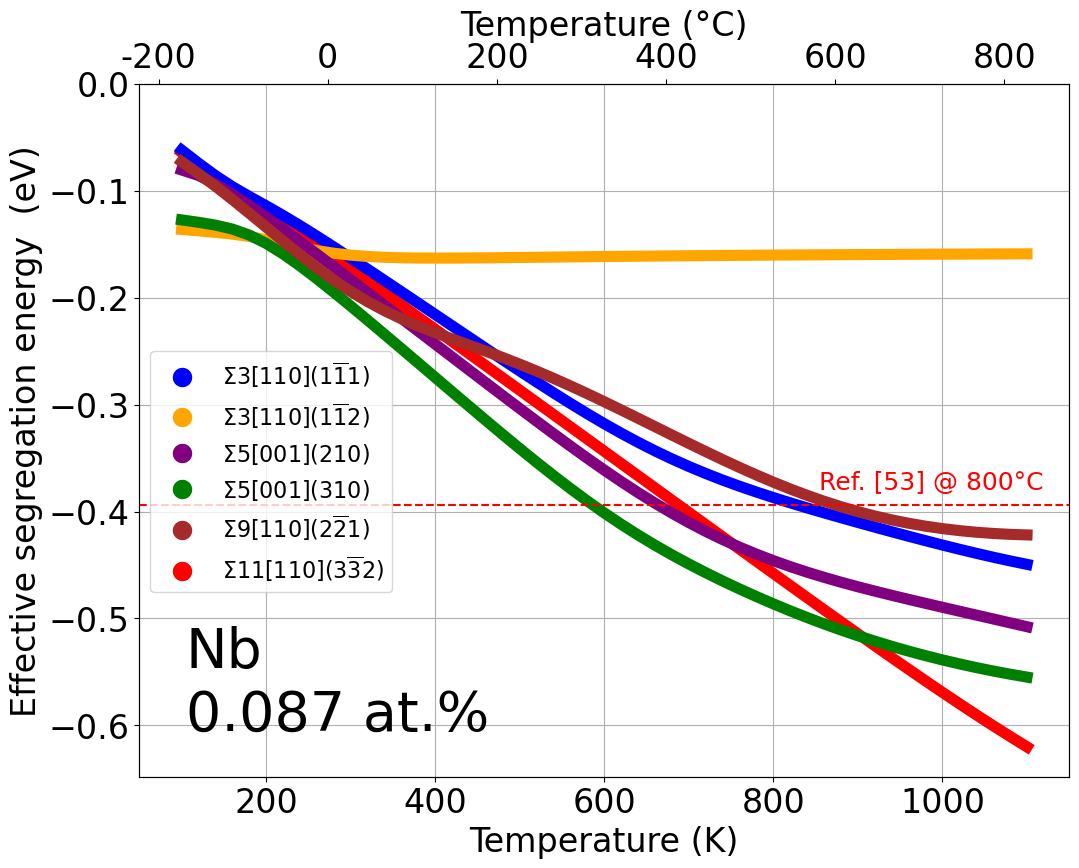

In [15]:
element = "Nb"
fig, ax1 = plot_Eseg_vs_temperature(df_spectra,
                                    element,
                                    gb_latex_dict,
                                    custom_colors,
                                    alloy_conc=0.01 * 0.087,
                                    temp_range=(100, 1100),
                                    temp_step=20,
                                    legend_loc='lower left',
                                    legend_bbox_to_anchor=(0.00, 0.25))

# Add the reference line
reference_value = -38 / 96.485
_ = ax1.axhline(reference_value, c="r", linestyle="--")

# Add text above the reference line
ax1.text(1120, reference_value+0.01,  "Ref. [53] @ 800°C", color="r", fontsize=18, verticalalignment='bottom', horizontalalignment='right')

# Adjust the y-axis limit
_ = ax1.set_ylim([None, 0])
write_path = f"{fig_savepath}/Figures/EffectiveSegregationEnergy/EffectiveSegregationEnergy_vs_temp_{element}.png"

fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)

fig.savefig(f"{fig_savepath}/Figure7b.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Figure 7c Mo
#### Why measuring segregation energies from interfacial excess in experiments and extrapolating this single segregation energy is a bad idea

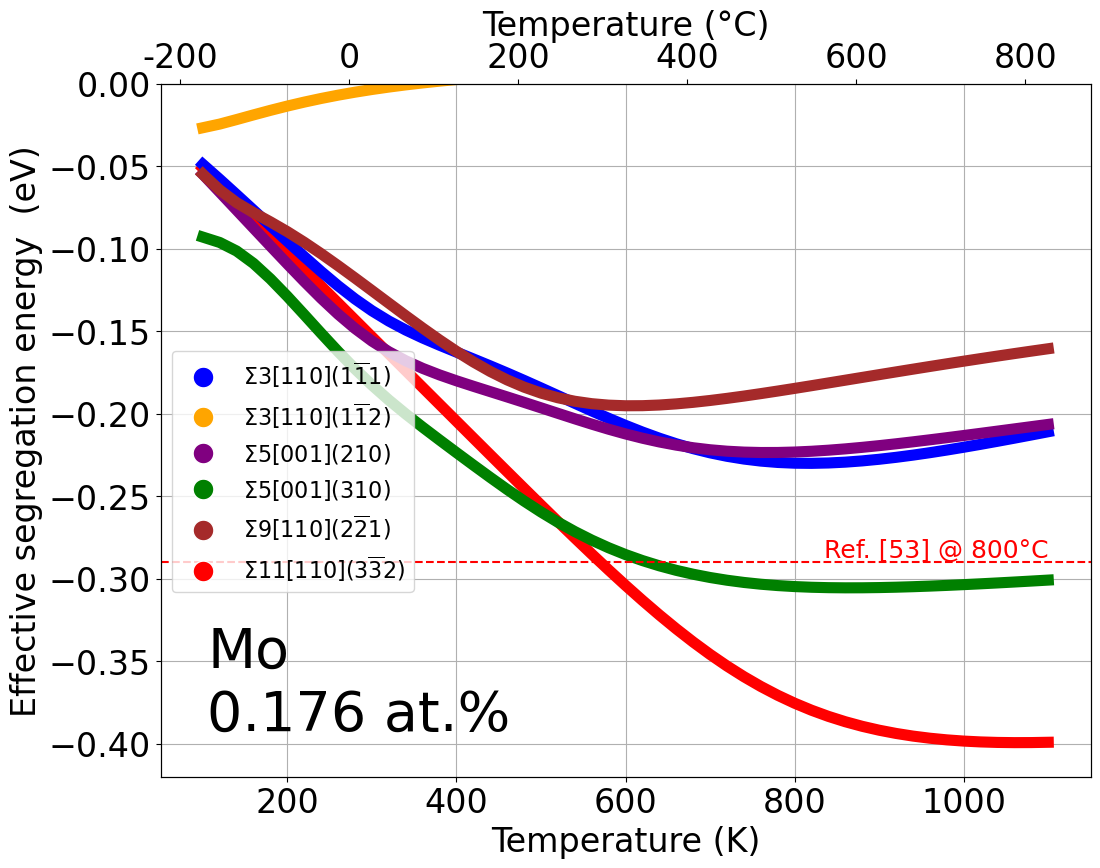

In [16]:
element = "Mo"
fig, ax1 = plot_Eseg_vs_temperature(df_spectra,
                                    element,
                                    gb_latex_dict,
                                    custom_colors,
                                    alloy_conc=0.01 * 0.176,
                                    temp_range=(100, 1100),
                                    temp_step=20,
                                    legend_loc='lower left',
                                    legend_bbox_to_anchor=(0.00, 0.25))

# Add the reference line
reference_value = -28 / 96.485
_ = ax1.axhline(reference_value, c="r", linestyle="--")

# Add text above the reference line
ax1.text(1100, reference_value,  "Ref. [53] @ 800°C", color="r", fontsize=18, verticalalignment='bottom', horizontalalignment='right')

# Adjust the y-axis limit
_ = ax1.set_ylim([None, 0])
write_path = f"{fig_savepath}/Figures/EffectiveSegregationEnergy/EffectiveSegregationEnergy_vs_temp_{element}.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"{fig_savepath}/Figure7c.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Figure 7d
#### A plot showing the site availability spectra vs. the probability that it would be occupied for Nb in our GBs

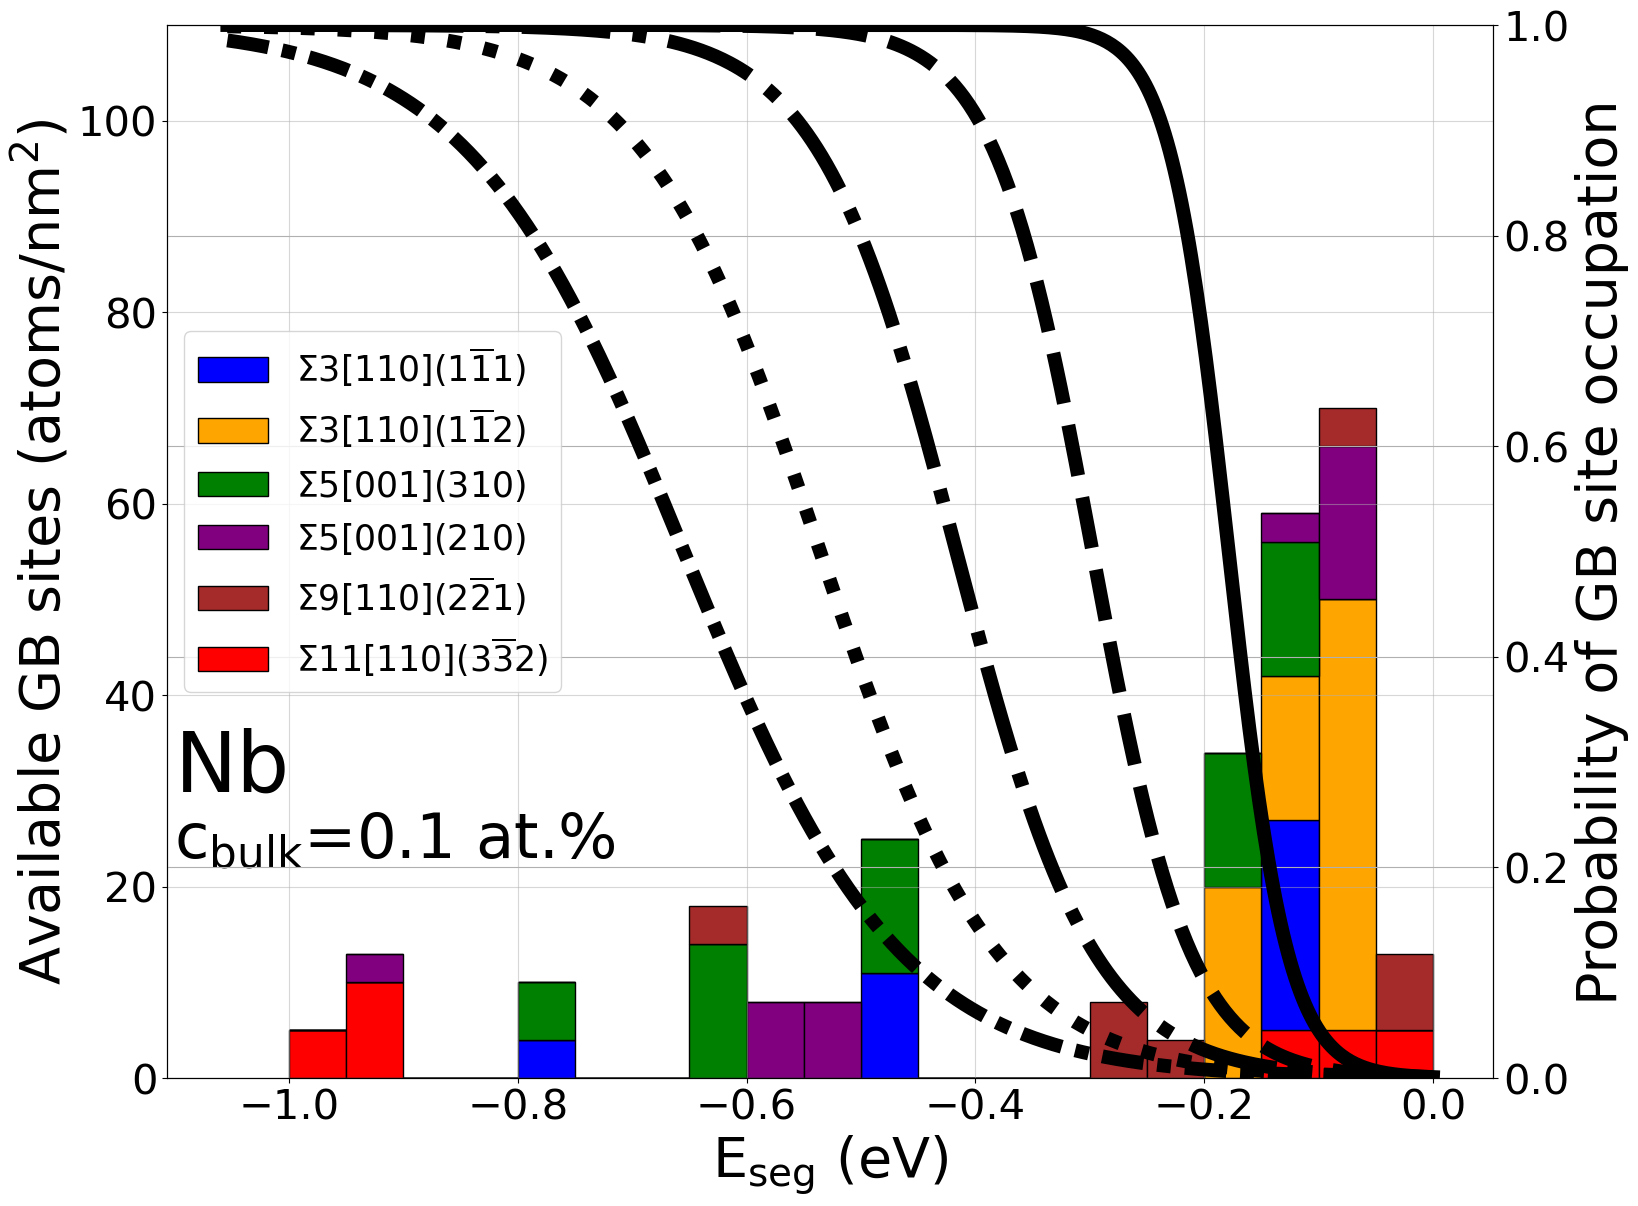

In [17]:
from FeGB_PtableSeg.plotters import plot_gb_histogram_with_cGB

# Set element and plot parameters
element = 'Nb'
fig, ax, ax2 = plot_gb_histogram_with_cGB(
    df,
    element=element,
    c_bulk=0.001,
    temperatures=[300, 500, 700, 900, 1100],
    ylims_hist=(0, 110),
    ylims_cGB=(0, 1.0),
    ylabel=r"Available GB sites (atoms/nm$^2$)",
    ylabel_fontsize=40,
    ylabel2="Probability of GB site occupation",
    ylabel2_fontsize=40,
    legend_fontsize=25,
    legend_loc=(0.0, 0.35),
    xlabel_fontsize=40,
    custom_colors=custom_colors,
    gb_latex_dict=gb_latex_dict
)

# Add text at the bottom left of ax2
ax.text(s=r"Nb", x=-1.1, y=30, fontsize=60)
ax.text(s=r"c$_{\rm{bulk}}$=0.1 at.%", x=-1.1, y=23, fontsize=45)

# Set font size for axis ticks
ax.tick_params(axis='both', labelsize=30)
ax2.tick_params(axis='both', labelsize=30)

# Define save path and save the figure
write_path = f"{fig_savepath}/Figures/SiteEsegDOS_LangmuirDistribution_{element}.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"{fig_savepath}/Figure7d_feed.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 8
### Figure 8a: Wsep in Rice-Wang theory

In [18]:
y_prop="R_Wsep_RGS" # Adjust this to be Wsep_RGS_min for absolute values
x_prop="Z"
plot_df = df[(df["E_seg"] < -0.05) & (df["convergence"] == True) & (df["R_Wsep_RGS"] > -1)].dropna(subset=["E_seg"])
for gb, group in plot_df.dropna(subset=[y_prop]).groupby("GB"):
    color = custom_colors.get(gb, 'black')  # Get color for each group, default to 'black' if not found

    Eseg_col = "E_seg"
    # For each "GB" group, find the minimum "E_seg"
    min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, Eseg_col).iloc[0])
    min_eseg_per_element = min_eseg_per_element[min_eseg_per_element[Eseg_col] <= 0]
    # Sorting values by 'Z' for consistent plotting
    min_eseg_per_element = min_eseg_per_element.sort_values(by='Z')
    #print(min_eseg_per_element[min_eseg_per_element["R_Wsep_RGS"] < 0.2][["job_name", "R_Wsep_RGS", "E_seg"]])
    # Plotting
    x_values = min_eseg_per_element[x_prop]
    y_values = min_eseg_per_element[y_prop]

#    line1, = ax1.plot(x_values, y_values, color=color, linestyle='--', marker="o", linewidth=3, markersize=6)
#    ax1.axhline(0, color=color)

/tmp/ipykernel_2102/398076269.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, Eseg_col).iloc[0])
/tmp/ipykernel_2102/398076269.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, Eseg_col).iloc[0])
/tmp/ipykernel_2102/398076269.py:9: DeprecationWar

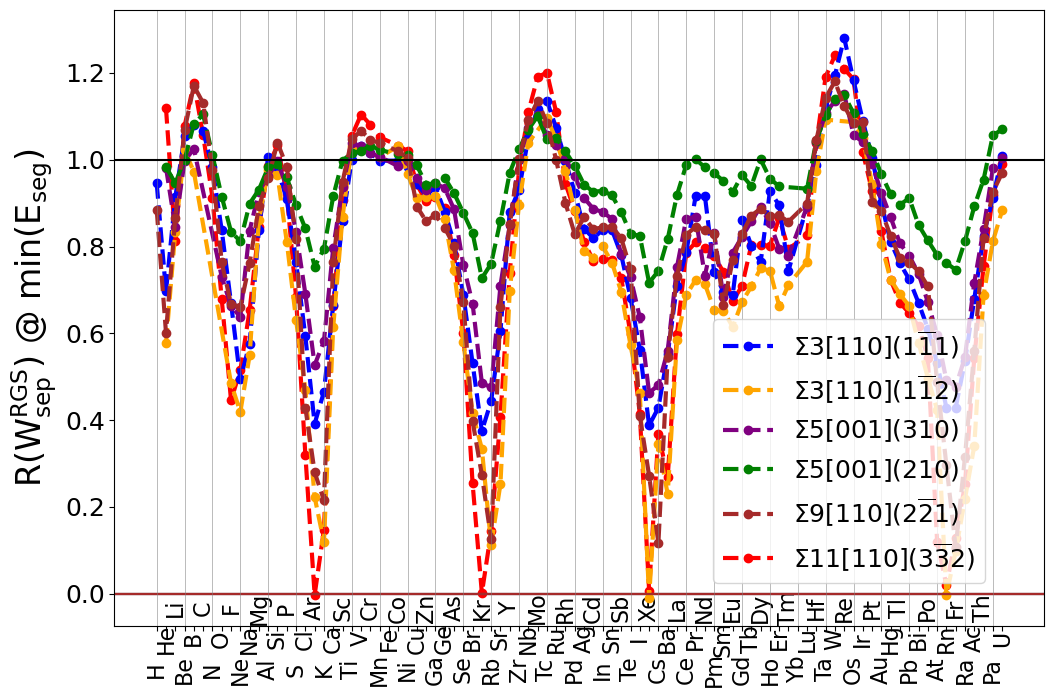

In [19]:
# 8a Wsep

# There's some weirdness going on with the Tm and Lu surfaces, which we filter out because they are (probably) non-physical
filtered_df = df[
    (df["E_seg"] < -0.05) &
    (df["convergence"] == True) &
    (df["R_Wsep_RGS"] > -1) &
    (
        (~df["element"].isin(["Tm", "Lu"])) | 
        ((df["element"].isin(["Tm", "Lu"])) & (df["R_Wsep_RGS"] > 0.4) & (df["R_Wsep_RGS"] < 1.5))
    )
].dropna(subset=["E_seg"])

fig, ax1 = plot_minEseg_prop_vs_Z(filtered_df,
                        y_prop="R_Wsep_RGS", # Adjust this to be Wsep_RGS_min for absolute values
                      x_prop="Z",
                      ylabel=r"R(W$_{\rm{sep}}^{\rm{RGS}})$ @ $\rm{min}(E_{\rm{seg}})$",
                      figsize=(12, 8),
                      shift_xticks=True,
                      xlabel_fontsize=24,
                      xtick_yshift = -0.045,
                      ylabel_fontsize=24,
                      xtick_fontsize=16,
                      ytick_fontsize=18,
                      legend_fontsize=18)
_ = ax1.axhline(1, color="k", linestyle="-")
fig.savefig(f"{fig_savepath}/Figure8a_feed.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Figure 8b: ANSBO in DDEC6 theory

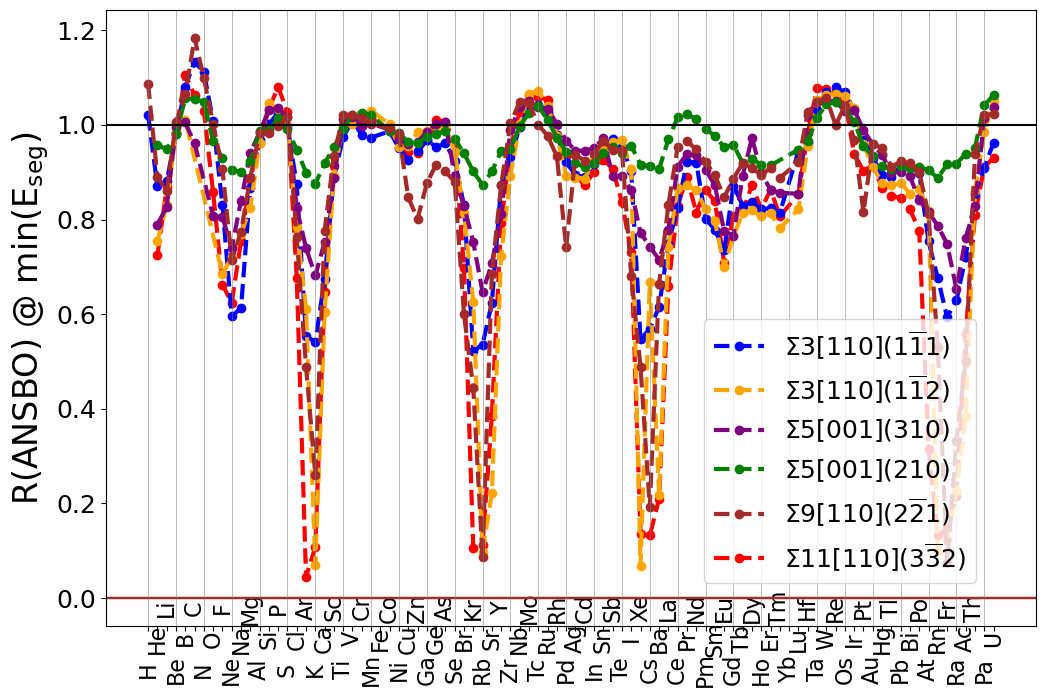

In [20]:
# 8b ANSBO
fig, ax1 = plot_minEseg_prop_vs_Z(df,
                        y_prop="R_DDEC6_ANSBO", # Adjust this to be DDEC6_ANSBO_min for absolute values
                      x_prop="Z",
                      ylabel=r"R(ANSBO) @ $\rm{min}(E_{\rm{seg}})$",
                      figsize=(12, 8),
                      shift_xticks=True,
                      xlabel_fontsize=24,
                      xtick_yshift = -0.045,
                      ylabel_fontsize=24,
                      xtick_fontsize=16,
                      ytick_fontsize=18,
                      legend_fontsize=18)
_ = ax1.axhline(1, color="k", linestyle="-")
fig.savefig(f"{fig_savepath}/Figure8b_feed.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 9
### Figure 9a

### Figure 9b

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


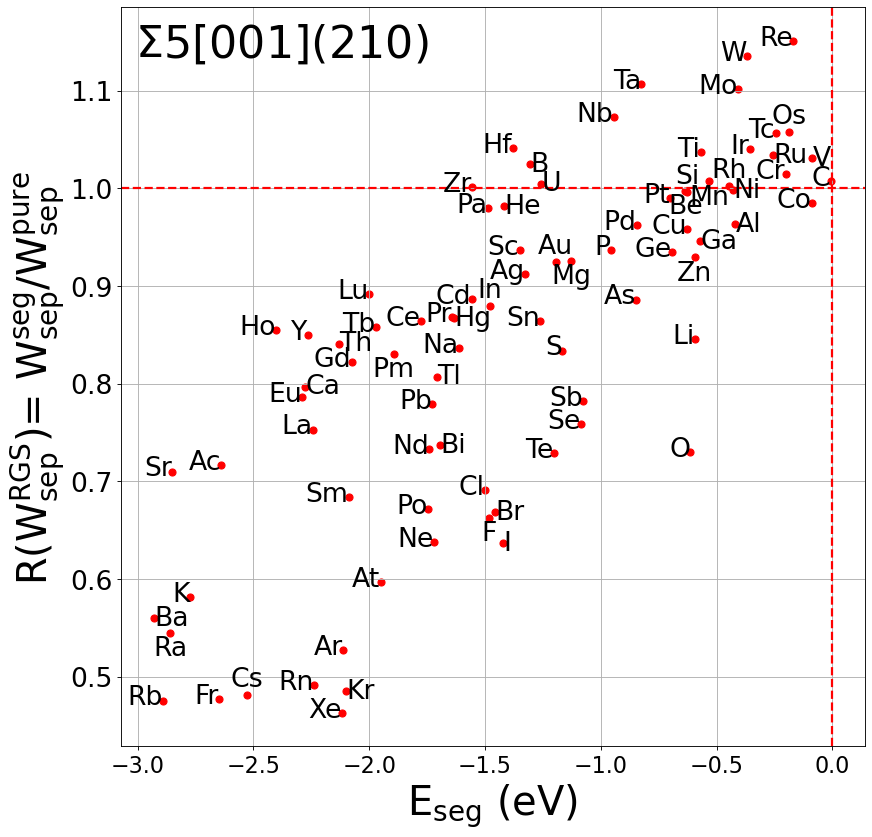

In [21]:
gb_to_plot = 'S5_RA001_S210'
x_prop = "E_seg"
y_prop = "R_Wsep_RGS"
# Try any particular GB! Find the appropriate strings from gb_latex_dict.keys()
# ['S5_RA001_S310', 'S5_RA001_S210', 'S11_RA110_S3_32', 'S3_RA110_S1_12', 'S3_RA110_S1_11', 'S9_RA110_S2_21']
# Exclude Tm because of weirdness of result... surface calc likely is wrong
fig, ax = plot_prop_vs_prop_GB(df[(df["convergence"]==True) & (df["element"] != "Tm")],
                            gb_to_plot=gb_to_plot,
                            y_prop=y_prop,
                            x_prop=x_prop,
                            ylabel=r"R(W$_{\rm{sep}}^{\rm{RGS}}$)= W$_{\rm{sep}}^{\rm{seg}}$/W$_{\rm{sep}}^{\rm{pure}}$", 
                            xlabel=r"E$_{\rm{seg}}$ (eV)",
                            custom_colors=custom_colors,
                            gb_latex_dict=gb_latex_dict,
                            label_left=[],
                            label_right=["Ga", "Al", "U", "B", "He", "Ni", "V", "Ru", "Bi", "Ca", "Kr", "I", "Hg", "Tl", "Th", "Ba", "Br"],
                            label_bottom=["Mn", "Be", "Mg", "Ra", "F", "Pm", "Zn"],
                            label_top=["Os", "Rh", "Si", "Au", "Cs", "In"],
                            horizontal_padding=0.0002,
                            vertical_padding=0.0001)
write_path = f"{fig_savepath}/Figures/SegregationEngineering_min_{x_prop}_vs_R_wsep_{gb_to_plot}.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)

write_path = f"{fig_savepath}/Figures/SegregationEngineering_min_{x_prop}_vs_R_wsep_{gb_to_plot}.png"
fig.savefig(f"{fig_savepath}/Figure9a_feed.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/SegregationEngineering_min_E_seg_vs_R_ANSBO_S5_RA001_S210.png


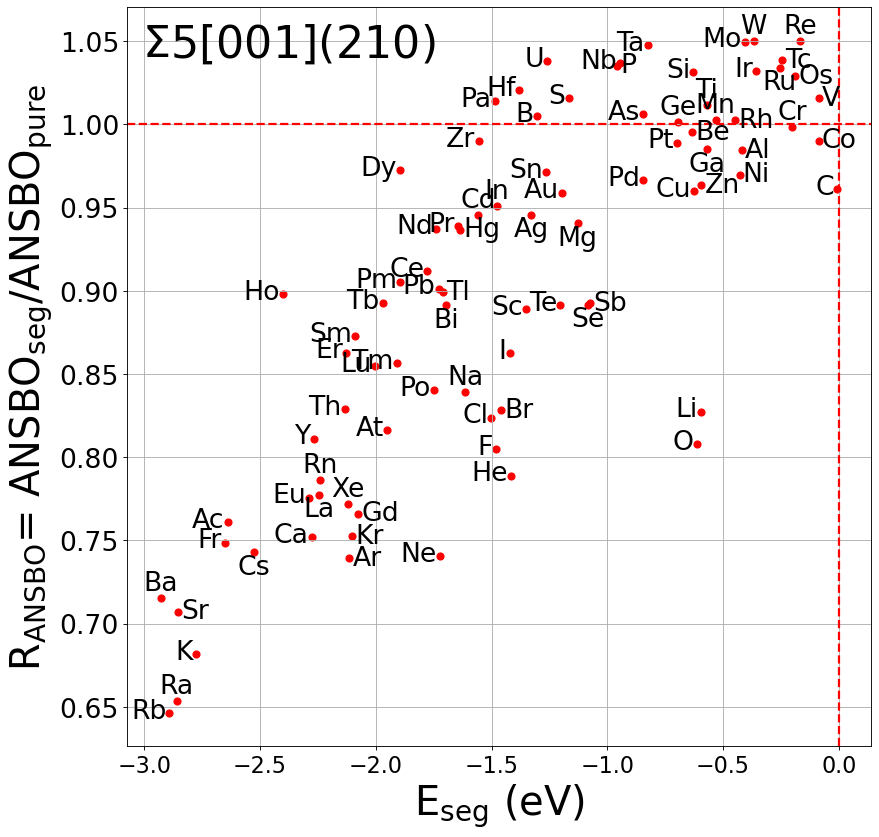

In [22]:
x_prop = "E_seg"
y_prop = "R_DDEC6_ANSBO"
gb_to_plot = 'S5_RA001_S210'
write_path = f"/mnt/c/Users/liger/Koofr/Fe-PtableTrends-Manuscript/Figures/SegregationEngineering_min_{x_prop}_vs_R_ANSBO_{gb_to_plot}.png"
print(write_path)

fig, ax = plot_prop_vs_prop_GB(df[df["convergence"]==True],
                            gb_to_plot=gb_to_plot,
                            y_prop=y_prop,
                            x_prop=x_prop,
                            ylabel=r"R$_{\rm{ANSBO}}$= ANSBO$_{\rm{seg}}$/ANSBO$_{\rm{pure}}$", 
                            xlabel=r"E$_{\rm{seg}}$ (eV)",
                            custom_colors=custom_colors,
                            gb_latex_dict=gb_latex_dict,
                            label_left=[],
                            label_right=["Tl", "P", "Sb", "Br", "Sr", "Gd", "Hg", "Zn", "Ni", "Be", "Rh", "Tc", "V", "Os", "Al","Co", "Kr", "Ar"],
                            label_bottom=["La", "Ru", "Se", "Mg", "Ag", "Ga", "Cs", "Bi"],
                            label_top=["Na", "Ra", "Xe", "Ti", "Mn", "Ge", "W", "Re", "In", "Cd", "Cr", "Ba", "Rn"],
                            horizontal_padding=0.002,
                            vertical_padding=0.001)#, fig_dir='path/to/save/figures')
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"{fig_savepath}/Figure9b_feed.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

In [23]:
areas = {}
for GB, GB_df in df.groupby("GB"):
    structure = Structure.from_str(GB_df.iloc[0].structure, fmt="json")
    areas[GB] = structure.volume/structure.lattice.c
df["area"] = df["GB"].map(areas)

## Figure 10

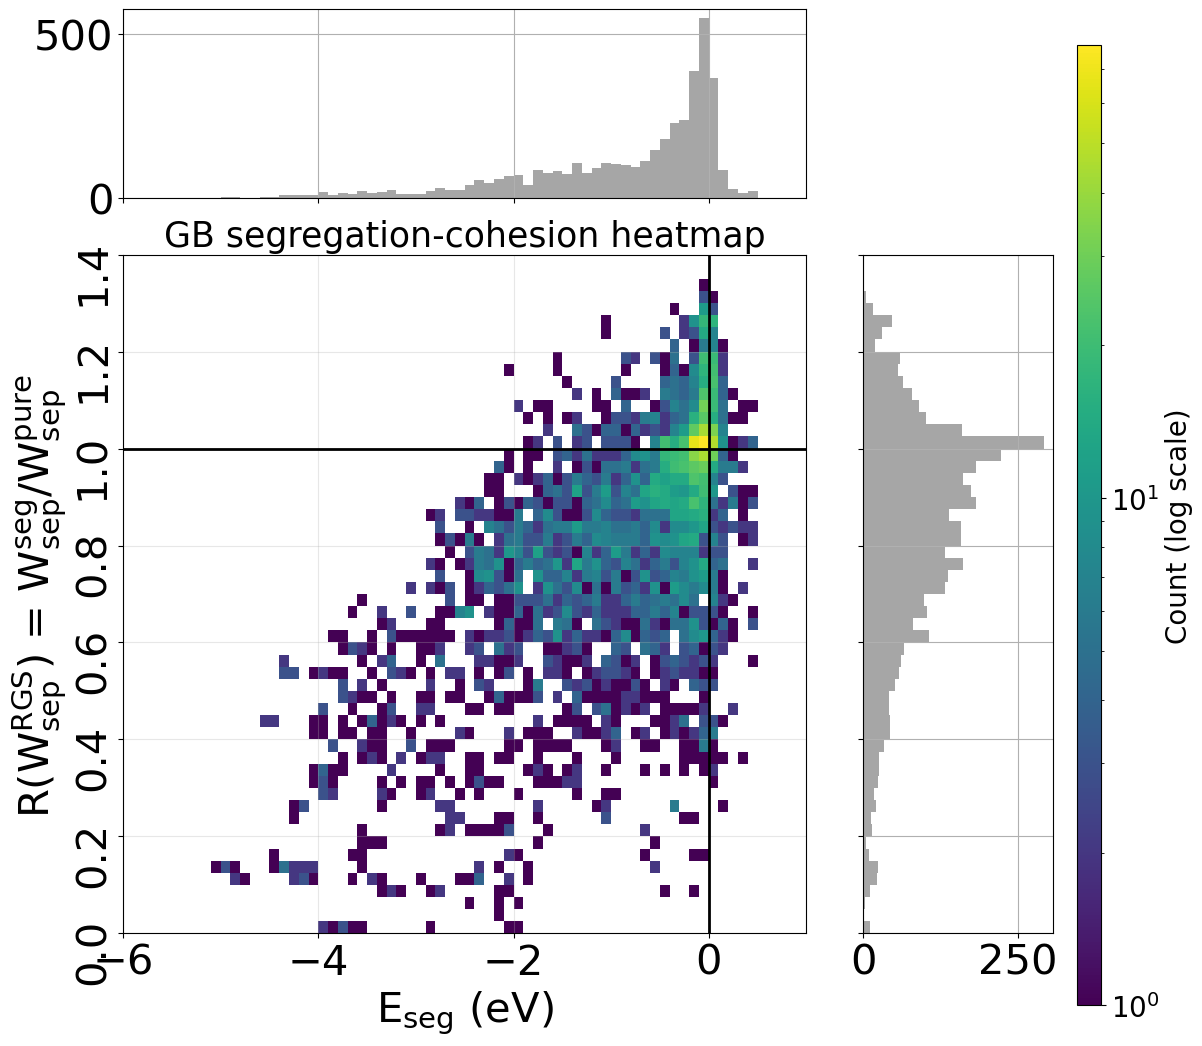

In [25]:
plot_df = df[df["E_seg"] < 0.5]

fig, ax1 = plot_prop_vs_prop_with_2d_histograms(
    x_values=plot_df.E_seg.values,
    y_values=plot_df.R_Wsep_RGS.values,
    figsize=(12, 12),
    x_label=r"E$_{\rm{seg}}$ (eV)",
    x_label_fontsize=30,
    xtick_fontsize=30,
    y_label=r"R(W$_{\rm{sep}}^{\rm{RGS}}$) = W$_{\rm{sep}}^{\rm{seg}}$/W$_{\rm{sep}}^{\rm{pure}}$ ",
    y_label_fontsize=30,
    ytick_fontsize=30,
    hist_tick_fontsize=30,
    legend_posn=(-0.01, 0.62),
    colorbar_tick_fontsize=20,  # Added colorbar tick font size
    colorbar_size=[0.92, 0.05, 0.02, 0.8],  # Colorbar size [left, bottom, width, height]
    ylims=(0.00, 1.4),
    x_bin_width=0.1,  # Bin width for the histograms
    y_bin_width=0.025)
# Add vertical and horizontal lines
ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
ax1.axvline(0, linewidth=2, linestyle="-", c="k")

# Set the title to indicate the current GB group
ax1.set_title(f"GB segregation-cohesion heatmap", fontsize=25)
write_path = f"{fig_savepath}/Figures/R_Wsep_vs_Eseg_AllSites_Heatmap.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"{fig_savepath}/Figure10a_feed.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

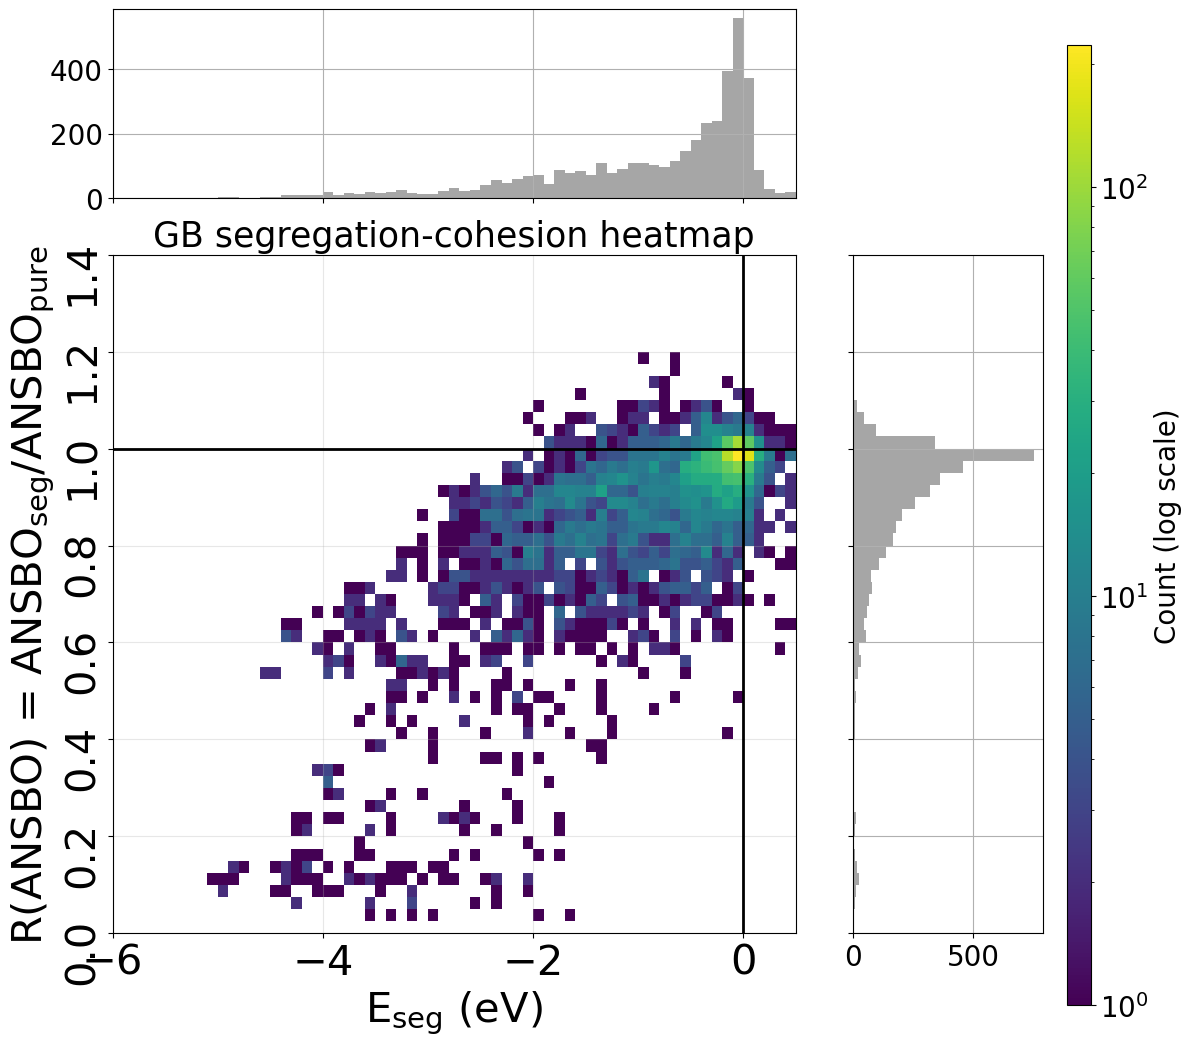

In [26]:
plot_df = df[df["E_seg"] < 0.5]

fig, ax1 = plot_prop_vs_prop_with_2d_histograms(
    x_values=plot_df.E_seg.values,
    y_values=plot_df.R_DDEC6_ANSBO.values,
    figsize=(12, 12),
    x_label=r"E$_{\rm{seg}}$ (eV)",
    x_label_fontsize=30,
    xtick_fontsize=30,
    y_label=r"R(${\rm{ANSBO}}$) = ANSBO$_{\rm{seg}}$/ANSBO$_{\rm{pure}}$",
    y_label_fontsize=30,
    ytick_fontsize=30,
    hist_tick_fontsize=20,
    legend_posn=(-0.01, 0.62),
    colorbar_tick_fontsize=20,  # Added colorbar tick font size
    colorbar_size=[0.92, 0.05, 0.02, 0.8],  # Colorbar size [left, bottom, width, height]
    ylims=(0.00, 1.4),
    xlims=(-6, 0.5),
    x_bin_width=0.1,  # Bin width for the histograms
    y_bin_width=0.025)

# Add vertical and horizontal lines
ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
ax1.axvline(0, linewidth=2, linestyle="-", c="k")

# Set the title to indicate the current GB group
ax1.set_title(f"GB segregation-cohesion heatmap", fontsize=25)
write_path = f"{fig_savepath}/Figures/R_ANSBO_vs_Eseg_AllSites_Heatmap.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"{fig_savepath}/Figure10b_feed.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 11

### Figure 11a

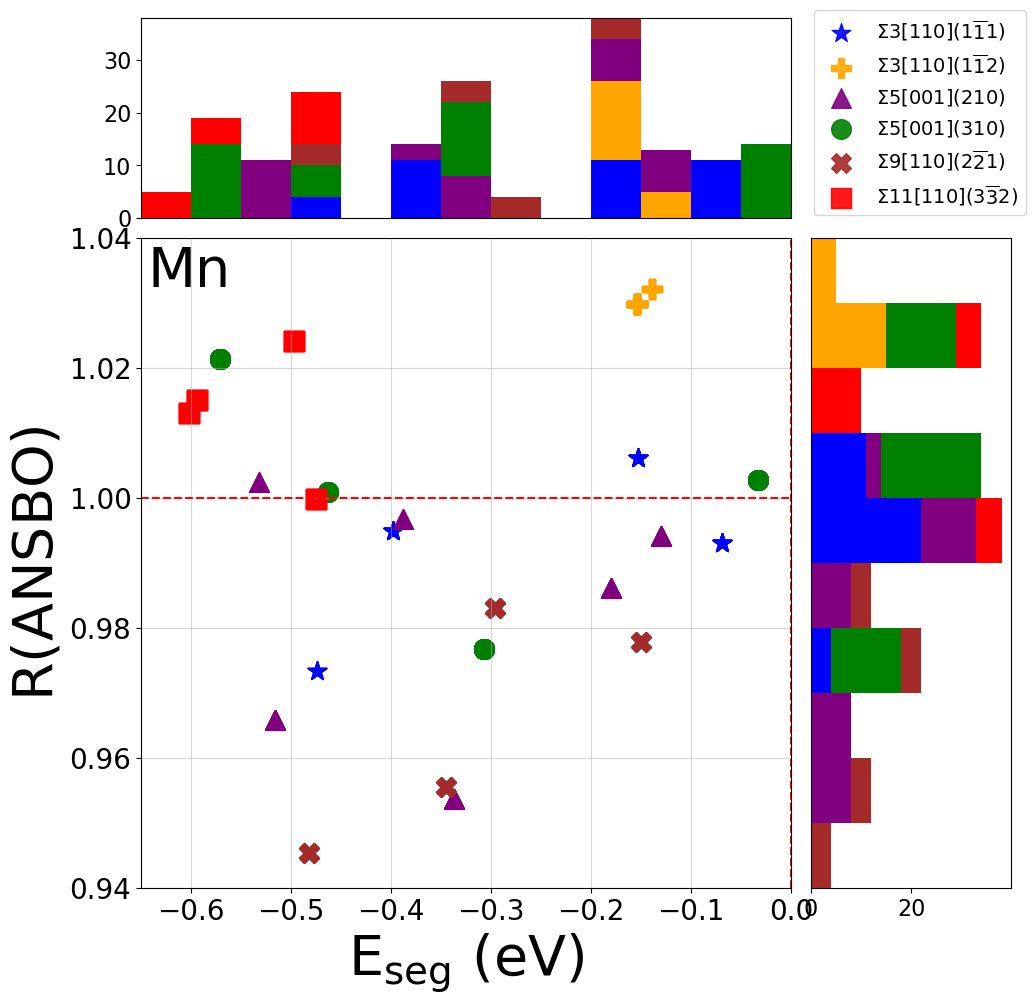

In [28]:
from FeGB_PtableSeg.plotters import plot_x_y_whist_spectra
props = ["R_DDEC6_ANSBO", "R_wsep", "eta_min_ANSBO", "eta_min_wsep_RGS", "DDEC6_min_ANSBO", "Wsep_RGS_min"]
prop_labels = [
    #r"$\rm{R}_{\rm{ANSBO}}$", 
    r"R(${\rm{ANSBO}}$)",
    r"$\rm{R}_{\rm{W}_{\rm{sep}}}$", 
    r"$\eta_{\rm{ANSBO}}$ (ANSBO)", 
    r"$\eta_{\rm{W}_{\rm{sep}}}$ (J/m$^2$)", 
    "DDEC6 ANSBO", 
    r"W$_{\rm{sep}}$ (J/m$^2$)"
]
prop_label_dict = dict(zip(props, prop_labels))
x_prop = "E_seg"
y_prop = props[0]
element = "Mn"
fig, ax = plot_x_y_whist_spectra(df=df[(df["element"] == element) & (df["E_seg"] < 0) & (df["dist_GB"] < 3.5)].dropna(subset="R_DDEC6_ANSBO"),
                    x=x_prop,
                    y=y_prop,
                    close_fig=False,
                    xlabel=r"$\rm{E}_{\rm{seg}}$ (eV)",
                    ylabel=prop_label_dict[y_prop],
                    xlabel_fontsize=40,
                    ylabel_fontsize=40,
                    legend_fontsize=14,
                    bin_width_x=0.05,
                    bin_width_y=0.01,
                    hist_ticksize=16,
                    title=element,
                    title_fontsize=40,
                    mask_limits=None)
_ = ax.axhline(y=1.0, color="r", linestyle="--")
_ = ax.axvline(x=0, color="r", linestyle="--")

fig.savefig(f"{fig_savepath}/Figure11a_feed.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Figure 11b

/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:940: RuntimeWarning: divide by zero encountered in divide
  c_GB = np.divide(c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature)),
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:941: RuntimeWarning: divide by zero encountered in divide
  (1 - c_bulk + c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature))))
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:940: RuntimeWarning: invalid value encountered in divide
  c_GB = np.divide(c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature)),


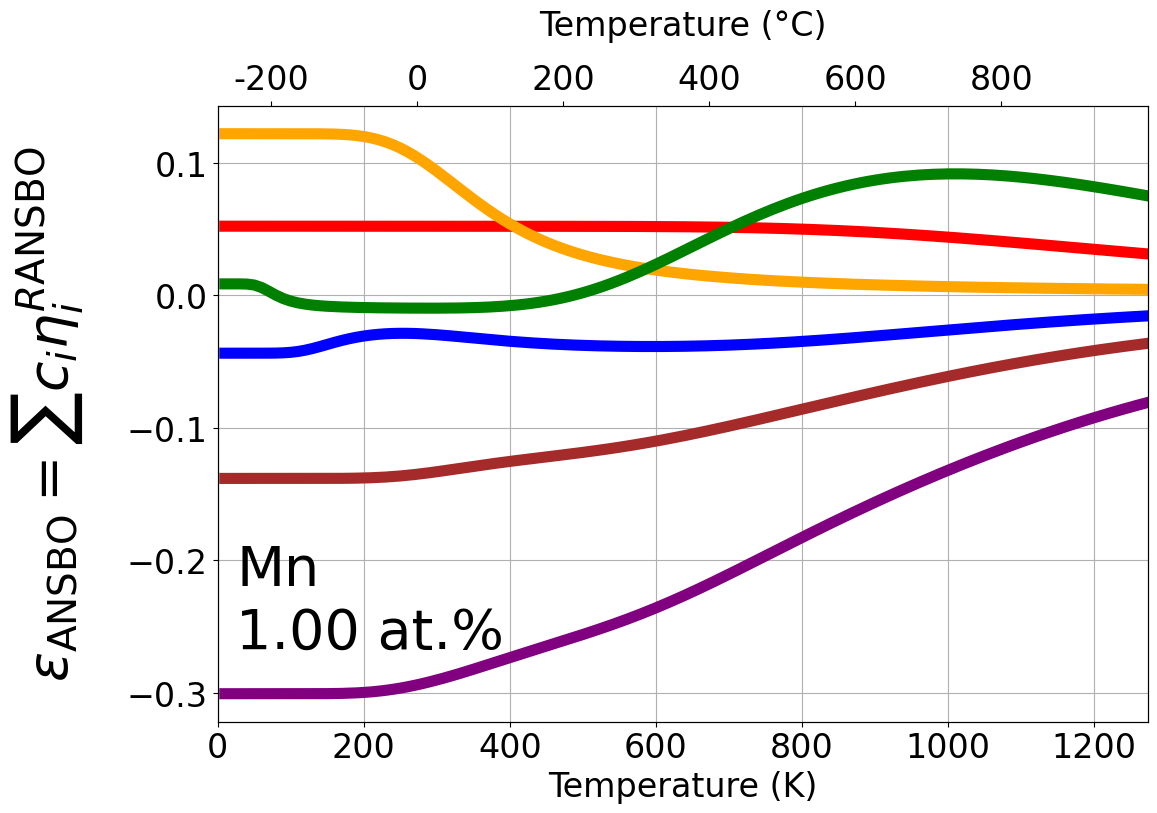

In [29]:
from FeGB_PtableSeg.plotters import plot_cohesion_vs_temp

start_temperature = 0
end_temperature = 1273
step = 10
temperature_range = np.arange(start_temperature, end_temperature, step)
alloy_conc = 0.01 # 1 at.%

fig_ansbo, ax_ansbo = plot_cohesion_vs_temp(df_spectra,
                                            element_to_plot="Mn",
                                            alloy_conc = alloy_conc,
                                            temp_range = (start_temperature, end_temperature),
                                            temp_step = step,
                                            custom_colors=custom_colors,
                                            gb_latex_dict=gb_latex_dict,
                                            xlims=[start_temperature, end_temperature],
                                            cohesion_type="ANSBO",
                                            ylabel_text= r"$\epsilon_{\text{ANSBO}} = \sum c_i \eta_i^{R{\text{ANSBO}}}$",
                                            ylabel_pad=30)

fig_ansbo.savefig(f"{fig_savepath}/Figure11b_feed.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:940: RuntimeWarning: divide by zero encountered in divide
  c_GB = np.divide(c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature)),
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:941: RuntimeWarning: divide by zero encountered in divide
  (1 - c_bulk + c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature))))
/root/FeGB_PtableSeg_FromFirstPrinciples_Data/FeGB_PtableSeg/plotters.py:940: RuntimeWarning: invalid value encountered in divide
  c_GB = np.divide(c_bulk * np.exp(-E_seg/(8.6173303e-05 * Temperature)),


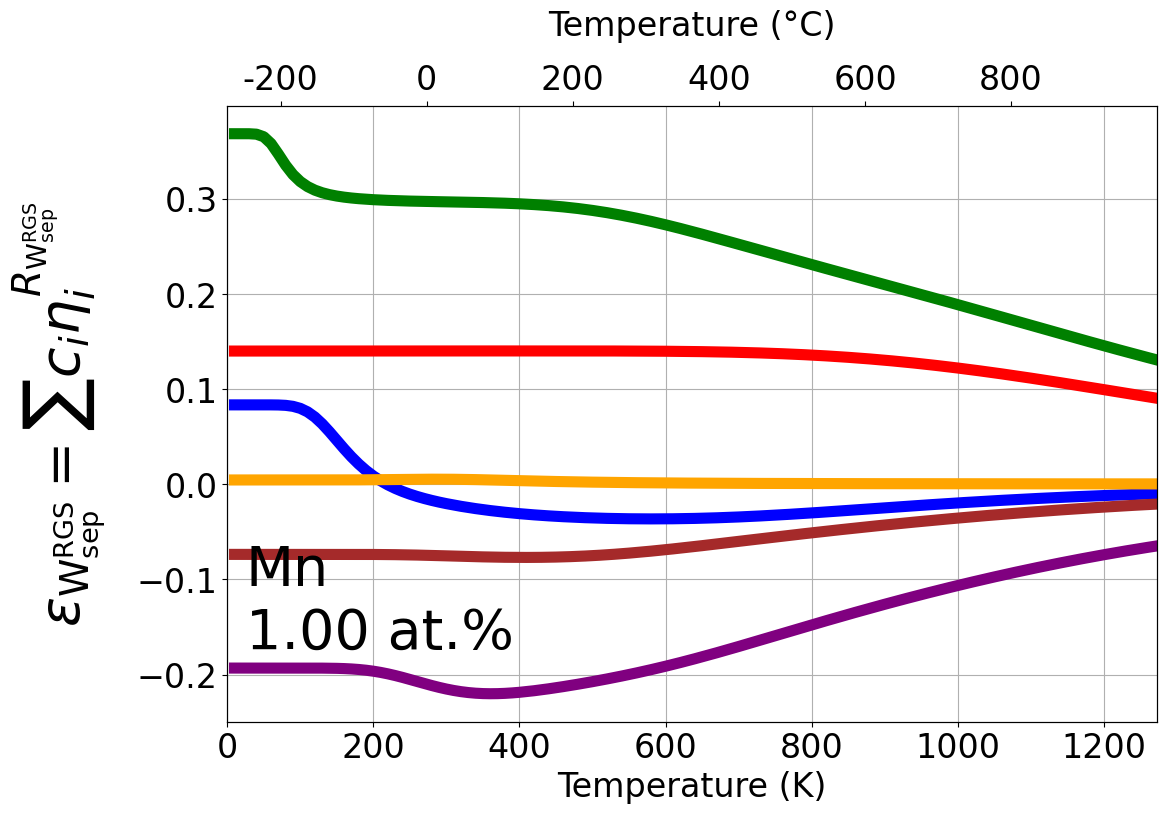

In [30]:
fig_wsep, ax_wsep = plot_cohesion_vs_temp(df_spectra,
                                            element_to_plot="Mn",
                                            alloy_conc = alloy_conc,
                                            temp_range = (start_temperature, end_temperature),
                                            temp_step = 10,
                                            custom_colors=custom_colors,
                                            gb_latex_dict=gb_latex_dict,
                                            xlims=[start_temperature, end_temperature],
                                            cohesion_type="wsep",
                                            ylabel_text = r"$\epsilon_{\text{W}_{\text{sep}}^{\text{RGS}}} = \sum c_i \eta_i^{R_{\text{W}_{\text{sep}}^{\text{RGS}}}}$")


## Figure 12a

In [31]:
df["R_ordered_ANSBO_lst"] = [np.array(row.ANSBO_Wsep_RGS_corr_vals)/row.pure_DDEC6_min_ANSBO for _, row in df.iterrows()]
df["R_Wsep_RGS_lst_minidx"] = df.R_Wsep_RGS_lst.apply(lambda x: np.argmin(x))
df["R_DDEC6_ANSBO_minidx"] = df.R_ordered_ANSBO_lst.apply(lambda x: np.argmin(x))

R_Wsep_basedonmin_ANSBO = []
for _, row in df.iterrows():
    try:
        a = row.R_Wsep_RGS_lst[row.R_DDEC6_ANSBO_minidx]
    except Exception as e:
        a = np.nan
    R_Wsep_basedonmin_ANSBO.append(a)

df["R_Wsep_RGS_wrt_min_ANSBO"] = R_Wsep_basedonmin_ANSBO

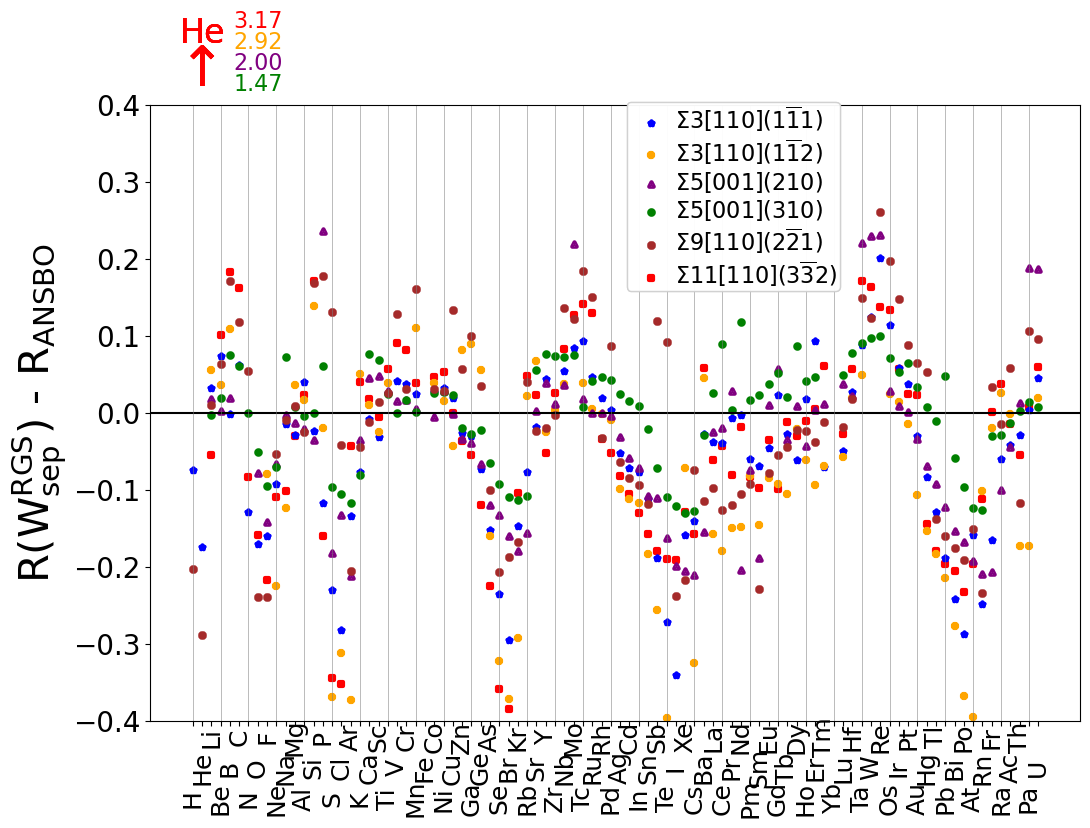

In [32]:
figsize = (12, 8)
ylabel = r"R(W$_{\rm{sep}}^{\rm{RGS}}$) - R$_{\rm{ANSBO}}$"
ylabel_fontsize = 30
xtick_labels = bulk_df.element.values
xtick_posns = bulk_df.Z.values
xtick_fontsize = 18
ytick_fontsize = 20
shift_xticks = True
xtick_yshift = 0
legend_fontsize = 16


def annotate_outliers(x, y, user_text, threshold=0.4, data=None):
    arrow_text = '↑' if y > threshold else '↓'
    arrow_direction = 'bottom' if y > threshold else 'top'
    arrow_color = 'red' if y > threshold else 'green'
    arrow_xytext = (0, 5) if y > threshold else (0, -5)  # Offset for the arrow

    # Annotating the arrow
    ax.annotate(arrow_text, xy=(x, threshold if y > threshold else -threshold), 
                xytext=arrow_xytext, textcoords="offset points", ha='center', va=arrow_direction, 
                color=arrow_color, fontsize=40)

    # User text placement relative to the arrow
    user_text_xytext = (0, 40) if y > threshold else (0, -20)  # Adjust this offset as needed
    ax.annotate(user_text, xy=(x, threshold if y > threshold else -threshold), 
                xytext=user_text_xytext, textcoords="offset points", ha='center', 
                va='bottom' if y > threshold else 'top', color=arrow_color, fontsize=24)
    
min_Eseg_df = []
for gb, gb_df in filtered_df.dropna(subset="R_Wsep_RGS_lst").groupby("GB"):
    # First, find the row indices of the minimum "E_seg" within each "Element" group
    idx_min_E_seg_per_element = gb_df.groupby('element')['E_seg'].idxmin()
    # Use these indices to select the corresponding rows from the original DataFrame
    min_E_seg_GB_df = df.loc[idx_min_E_seg_per_element].reset_index(drop=True)
    min_Eseg_df.append(min_E_seg_GB_df)

min_Eseg_perGB_df = pd.concat(min_Eseg_df)


# Create a plot
fig, ax = plt.subplots(figsize=figsize)
gb_legends = []  # Initialize outside the loop to collect all legend entries
thresholds = [-0.4, 0.4]

# Looping over each unique "element"
for gb, gb_df in min_Eseg_perGB_df.groupby("GB"):
    x_values = gb_df['Z']
    # I am comparing the min ANSBO cleavage plane cohesion quant vs Wsep
    y_values = gb_df['R_Wsep_RGS_wrt_min_ANSBO'] - gb_df['R_DDEC6_ANSBO'] 
    line = ax.scatter(x_values, y_values, color=custom_colors[gb], marker=gb_marker_dict[gb], linewidth=3, s=10)
    for x, y in zip(x_values, y_values):
        if y > 0.7 or y < -0.7:
            annotate_outliers(x, y,user_text="He", data=y)
    gb_legends.append((line, gb_latex_dict[gb]))  # Append each legend entry
ax.axhline(0, color="k")  # Horizontal line at y=0
ax.set_ylim(thresholds[0], thresholds[1])  # Set y-axis limits to -0.7 to 0.7

# Set labels and axis properties
ax.set_ylabel(ylabel, fontsize=ylabel_fontsize)
if xtick_labels is not None and xtick_posns is not None:
    ax.set_xticks(xtick_posns)
    ax.set_xticklabels(xtick_labels, fontsize=xtick_fontsize, rotation=90, va='center')
ax.tick_params(axis='y', labelsize=ytick_fontsize)

# Adjust the position of x-tick labels if needed
if shift_xticks:
    shifts = [-0.11, -0.06, -0.01, 0.04, 0.09]  # Define y-shift values
    for i, label in enumerate(ax.get_xticklabels()):
        label.set_y(shifts[:3][i % 3] + xtick_yshift)
        
gridline_positions = np.arange(1, 93, 3)
for pos in gridline_positions:
    ax.axvline(x=pos, linestyle='-', linewidth='0.5', color='grey', alpha=0.75)

# Adjust the order of legend entries if needed and create legend
gb_legends.append(gb_legends.pop(0))
gb_legend = ax.legend(*zip(*gb_legends), bbox_to_anchor=(0.5, 0.68), loc="lower left", fontsize=legend_fontsize, handletextpad=0.1, borderpad=0.1, labelspacing=0.15)
ax.add_artist(gb_legend)

outliers = {}

# Loop to collect outliers
for gb, gb_df in min_Eseg_perGB_df.groupby("GB"):
    x_values = gb_df['Z']
    y_values = gb_df['R_Wsep_RGS_wrt_min_ANSBO'] - gb_df['R_DDEC6_ANSBO']
    color = custom_colors[gb]  # Ensure this matches your data structure

    for x, y in zip(x_values, y_values):
        if abs(y) > 0.7:
            data_text = f'{y:.2f}'
            if x not in outliers:
                outliers[x] = {'texts': [data_text], 'color': [color]}
            else:
                outliers[x]['texts'].append(data_text)
                outliers[x]["color"].append(color)
                
# Reverse the dictionary keys
reversed_keys = list(outliers.keys())[::-1]

# Annotating the collected outliers in reversed order
for x in reversed_keys:
    data = outliers[x]
    offset = 0  # Initialize an offset to stagger annotations to avoid overlap
    combined_texts = zip(data['texts'][::-1], data['color'][::-1])  # Ensure this uses 'colors' if each text has a unique color
    for text, color in combined_texts:
        ax.annotate(text, xy=(x + 6, 0.4), xytext=(0, 7 + 10 * offset), textcoords="offset points",
                    ha='center', va='bottom', fontsize=16, color=color)
        offset += 1.5  # Increment offset for the next annotation
        
fig.savefig(f"{fig_savepath}/Figure12a.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

## Figure 12b

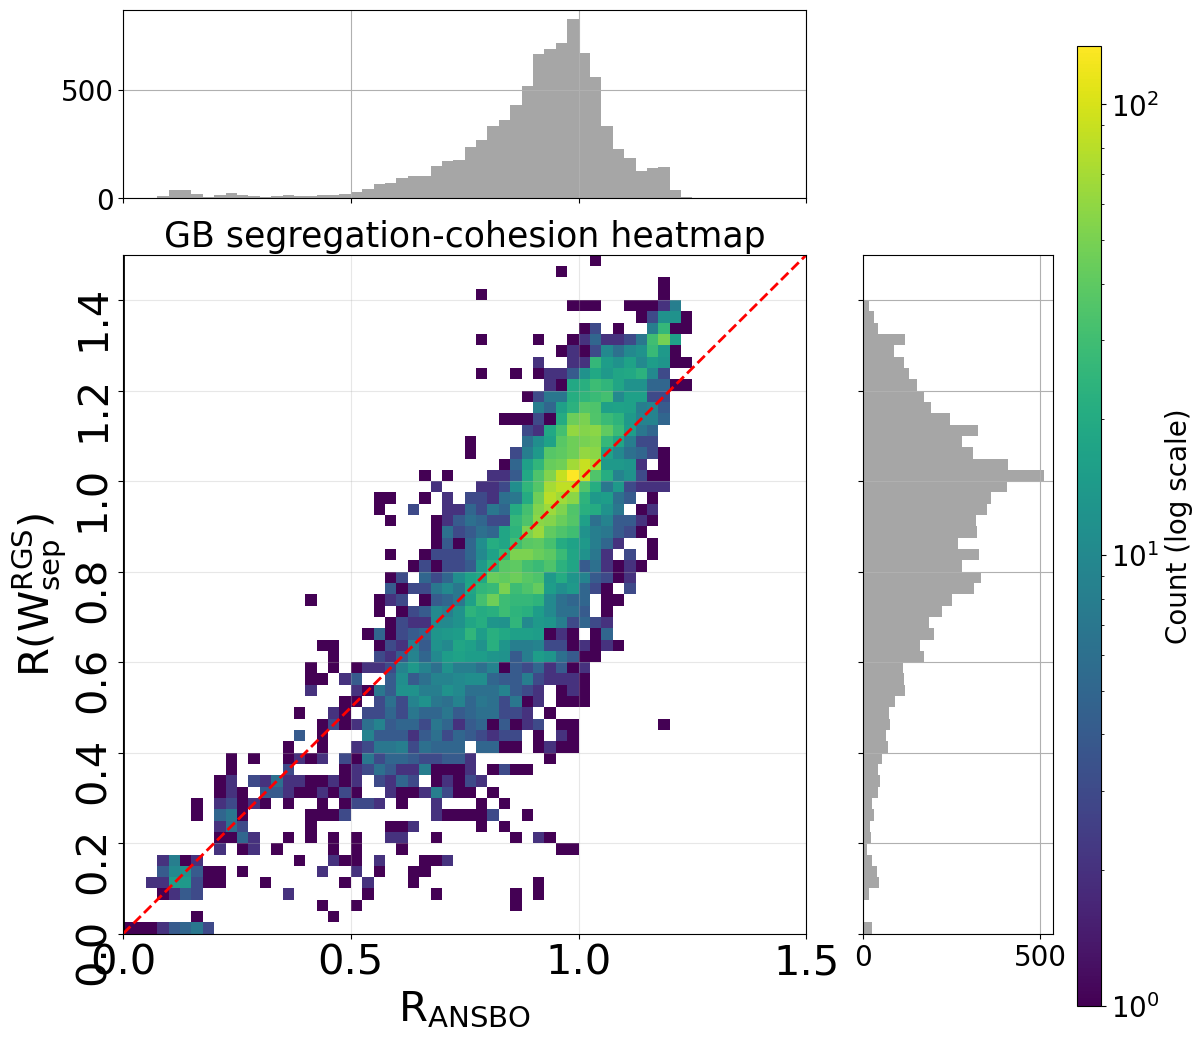

In [33]:
import numpy as np

n = 3  # number of smallest cohesion values to keep per segregation case

x_filtered = []
y_filtered = []

for idx, row in plot_df[plot_df["E_seg"]<-0.1].iterrows():
    # Get the list-like values and the pure value for division
    ansbo_vals = row["ANSBO_Wsep_RGS_corr_vals"]
    r_wsep_vals = row["R_Wsep_RGS_lst"]
    pure_val = row["pure_DDEC6_min_ANSBO"]
    
    # Skip this row if:
    #  - Either ansbo_vals or r_wsep_vals is not list-like
    #  - pure_val is NaN or zero (to avoid division errors)
    #  - Their lengths don't match
    if not (isinstance(ansbo_vals, (list, np.ndarray)) and isinstance(r_wsep_vals, (list, np.ndarray))):
        continue
    if pd.isna(pure_val) or pure_val == 0:
        continue
    if len(ansbo_vals) != len(r_wsep_vals):
        continue

    # Adjust the ansbo values by dividing by pure_DDEC6_min_ANSBO
    adjusted_ansbo_vals = [v / pure_val for v in ansbo_vals]

    # Sort indices by the adjusted ansbo values (smallest first)
    sorted_indices = sorted(range(len(adjusted_ansbo_vals)), key=lambda i: adjusted_ansbo_vals[i])
    
    # Take the first n indices
    selected_indices = sorted_indices[:n]
    
    # For each selected index, extract the corresponding x and y values
    for i in selected_indices:
        x_val = r_wsep_vals[i]
        y_val = adjusted_ansbo_vals[i]
        # Only keep the values if both are within [0, 2]
        if 0 <= x_val <= 2 and 0 <= y_val <= 2:
            x_filtered.append(x_val)
            y_filtered.append(y_val)

# Now x_filtered and y_filtered are ready for plotting:
fig, ax1 = plot_prop_vs_prop_with_2d_histograms(
    x_values=y_filtered,
    y_values=x_filtered,
    figsize=(12, 12),
    x_label=r"R$_{\rm{ANSBO}}$",
    x_label_fontsize=30,
    xtick_fontsize=30,
    y_label=r"R(W$_{\rm{sep}}^{\rm{RGS}}$)",
    y_label_fontsize=30,
    ytick_fontsize=30,
    hist_tick_fontsize=20,
    legend_posn=(-0.01, 0.62),
    colorbar_tick_fontsize=20,
    colorbar_size=[0.92, 0.05, 0.02, 0.8],
    ylims=(0.00, 1.5),
    xlims=(0.00, 1.5),
    x_bin_width=0.025,
    y_bin_width=0.025
)

# Add vertical and horizontal lines
#ax1.axhline(1.00, linewidth=2, linestyle="-", c="k")
ax1.axvline(0, linewidth=2, linestyle="-", c="k")
limit = 1.5
ax1.plot([0, limit], [0, limit], color='red', linestyle='--', linewidth=2)

# Set the title
ax1.set_title("GB segregation-cohesion heatmap", fontsize=25)
write_path = f"{fig_savepath}/Figures/R_Wsep_vs_R_ANSBO_heatmap.png"
fig.savefig(write_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"{fig_savepath}/Figure12b.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

In [34]:
# Need atomic layers from the original dataframe.

def closest_interval_index(cleavage_plane, atomic_layers):
    """Find the closest interval index for the cleavage plane."""
    # Find index of closest lower or equal atomic layer
    idx = np.searchsorted(atomic_layers, cleavage_plane, side='right') - 1
    if idx < 0 or idx >= len(atomic_layers) - 1:
        return None
    return idx
df['R_Wsep_RGS_lst_aligned'] = None   
for idx, row in df.iterrows():
    try:
        # Number of intervals is one less than the number of atomic layer points
        num_intervals = len(row['DDEC6_ANSBO_atomic_layers']) - 1
        aligned_values = [np.nan] * num_intervals  # Initialize with NaNs
        for plane, wsep_value in zip(row['Wsep_RGS_cleavage_planes'], row['R_Wsep_RGS_lst']):
            interval_index = closest_interval_index(plane, row['DDEC6_ANSBO_atomic_layers'])
            if interval_index is not None and interval_index < num_intervals:
                aligned_values[interval_index] = wsep_value
    except:
        num_intervals = np.nan
        aligned_values = np.nan
    
    df.at[idx, 'R_Wsep_RGS_lst_aligned'] = aligned_values

# Supplementary Information plots available in SupplementaryFigures notebook - SupplementaryFigures.ipynb